In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import talib

In [2]:
dataAp=pd.read_csv("../data/AAPL_historical_data.csv")
dataAm=pd.read_csv("../data/AMZN_historical_data.csv")
dataGo=pd.read_csv("../data/GOOG_historical_data.csv")
dataMe=pd.read_csv("../data/META_historical_data.csv")
dataMs=pd.read_csv("../data/MSFT_historical_data.csv")
dataNv=pd.read_csv("../data/NVDA_historical_data.csv")
dataTs=pd.read_csv("../data/TSLA_historical_data.csv")

## Technical indicator analysis of Apple company's stock price

In [3]:
dataAp.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.098943,469033600,0.0,0.0
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093781,175884800,0.0,0.0
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086898,105728000,0.0,0.0
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089049,86441600,0.0,0.0
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091630,73449600,0.0,0.0


In [4]:
dataAp["Date"].min()

'1980-12-12'

In [5]:
dataAp.shape

(10998, 9)

In [6]:
dataAp[dataAp.isnull()].sum()

Date              0
Open            0.0
High            0.0
Low             0.0
Close           0.0
Adj Close       0.0
Volume          0.0
Dividends       0.0
Stock Splits    0.0
dtype: object

When calculating technical indicators such as the Simple Moving Average (SMA), Relative Strength Index (RSI), and Moving Average Convergence Divergence (MACD), it's common to encounter `NaN` values at the beginning of the dataset. This occurs because these indicators require a minimum number of data points to provide a valid calculation. For instance:

- **SMA (Simple Moving Average)**: The SMA with a period of 20 requires at least 20 data points to calculate the average. As a result, the first 19 values will be `NaN` since there isn't enough data to compute a 20-day moving average.
- **RSI (Relative Strength Index)**: The RSI typically uses a 14-period calculation window. Consequently, the first 13 values will be `NaN` because there isn't sufficient data to perform the calculation.
- **MACD (Moving Average Convergence Divergence)**: The MACD Line, Signal Line, and Histogram calculations are based on exponential moving averages, which also require a certain number of data points. This can result in `NaN` values at the start.
### To maintain data consistency, prevent data loss, enable tailored analysis, and ensure smooth rolling calculations, the following code fills `NaN` values with carefully chosen initial values. This approach enhances the reliability and robustness of our analysis, setting a solid foundation for accurate and insightful financial modeling.

In [7]:
# Calculate Moving Average
dataAp['SMA_20'] = talib.SMA(dataAp['Close'], timeperiod=20)
dataAp['SMA_50'] = talib.SMA(dataAp['Close'], timeperiod=50)

# Set initial values for SMA_20 and SMA_50
initial_sma_20 = dataAp['Close'].iloc[19]  # Value for the first SMA_20
initial_sma_50 = dataAp['Close'].iloc[49]  # Value for the first SMA_50

# Fill NaN values for SMA_20 and SMA_50 with the initial values
dataAp['SMA_20'] = dataAp['SMA_20'].fillna(initial_sma_20)
dataAp['SMA_50'] = dataAp['SMA_50'].fillna(initial_sma_50)

In [8]:
dataAp

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,SMA_20,SMA_50
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.098943,469033600,0.0,0.0,0.141183,0.106027
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093781,175884800,0.0,0.0,0.141183,0.106027
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086898,105728000,0.0,0.0,0.141183,0.106027
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089049,86441600,0.0,0.0,0.141183,0.106027
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091630,73449600,0.0,0.0,0.141183,0.106027
...,...,...,...,...,...,...,...,...,...,...,...
10993,2024-07-24,224.000000,224.800003,217.130005,218.539993,218.287323,61777600,0.0,0.0,224.228500,208.474199
10994,2024-07-25,218.929993,220.850006,214.619995,217.490005,217.238556,51391200,0.0,0.0,224.440500,209.098399
10995,2024-07-26,218.699997,219.490005,216.009995,217.960007,217.708008,41601300,0.0,0.0,224.633500,209.709000
10996,2024-07-29,216.960007,219.300003,215.750000,218.240005,217.987686,36311800,0.0,0.0,225.014500,210.279400


In [9]:
# Calculate RSI
initial_rsi = dataAp['Close'].iloc[13]
dataAp['RSI'] = talib.RSI(dataAp['Close'], timeperiod=14)
dataAp['RSI'] = dataAp['RSI'].fillna(initial_rsi)

In [10]:
dataAp

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,SMA_20,SMA_50,RSI
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.098943,469033600,0.0,0.0,0.141183,0.106027,0.154018
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093781,175884800,0.0,0.0,0.141183,0.106027,0.154018
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086898,105728000,0.0,0.0,0.141183,0.106027,0.154018
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089049,86441600,0.0,0.0,0.141183,0.106027,0.154018
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091630,73449600,0.0,0.0,0.141183,0.106027,0.154018
...,...,...,...,...,...,...,...,...,...,...,...,...
10993,2024-07-24,224.000000,224.800003,217.130005,218.539993,218.287323,61777600,0.0,0.0,224.228500,208.474199,48.687742
10994,2024-07-25,218.929993,220.850006,214.619995,217.490005,217.238556,51391200,0.0,0.0,224.440500,209.098399,47.386437
10995,2024-07-26,218.699997,219.490005,216.009995,217.960007,217.708008,41601300,0.0,0.0,224.633500,209.709000,48.055700
10996,2024-07-29,216.960007,219.300003,215.750000,218.240005,217.987686,36311800,0.0,0.0,225.014500,210.279400,48.476184


In [11]:
# Calculate MACD
initial_macd_line = dataAp['Close'].iloc[25]
initial_macd_signal = dataAp['Close'].iloc[25]
initial_macd_hist = initial_macd_line - initial_macd_signal
dataAp['MACD_Line'], dataAp['MACD_Signal'], dataAp['MACD_Hist'] = talib.MACD(dataAp['Close'], fastperiod=12, slowperiod=26, signalperiod=9)

dataAp['MACD_Line'] = dataAp['MACD_Line'].fillna(initial_macd_line)
dataAp['MACD_Signal'] = dataAp['MACD_Signal'].fillna(initial_macd_signal)
dataAp['MACD_Hist'] = dataAp['MACD_Hist'].fillna(initial_macd_hist)

In [12]:
dataAp

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,SMA_20,SMA_50,RSI,MACD_Line,MACD_Signal,MACD_Hist
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.098943,469033600,0.0,0.0,0.141183,0.106027,0.154018,0.142299,0.142299,0.000000
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093781,175884800,0.0,0.0,0.141183,0.106027,0.154018,0.142299,0.142299,0.000000
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086898,105728000,0.0,0.0,0.141183,0.106027,0.154018,0.142299,0.142299,0.000000
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089049,86441600,0.0,0.0,0.141183,0.106027,0.154018,0.142299,0.142299,0.000000
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091630,73449600,0.0,0.0,0.141183,0.106027,0.154018,0.142299,0.142299,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10993,2024-07-24,224.000000,224.800003,217.130005,218.539993,218.287323,61777600,0.0,0.0,224.228500,208.474199,48.687742,4.662717,6.678882,-2.016164
10994,2024-07-25,218.929993,220.850006,214.619995,217.490005,217.238556,51391200,0.0,0.0,224.440500,209.098399,47.386437,3.748082,6.092722,-2.344640
10995,2024-07-26,218.699997,219.490005,216.009995,217.960007,217.708008,41601300,0.0,0.0,224.633500,209.709000,48.055700,3.026267,5.479431,-2.453164
10996,2024-07-29,216.960007,219.300003,215.750000,218.240005,217.987686,36311800,0.0,0.0,225.014500,210.279400,48.476184,2.448591,4.873263,-2.424672


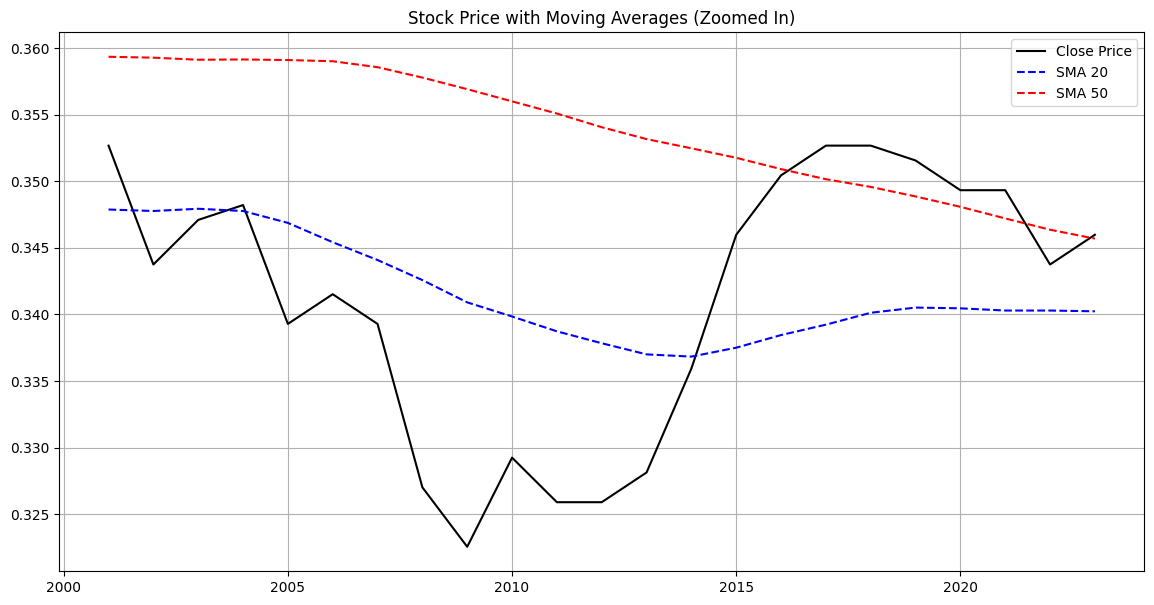

In [13]:
start_date = '2000-06-01'
end_date = '2023-12-01'

plt.figure(figsize=(14, 7))
plt.plot(dataAp['Close'].loc[start_date:end_date], label='Close Price', color='black', linewidth=1.5)
plt.plot(dataAp['SMA_20'].loc[start_date:end_date], label='SMA 20', color='blue', linestyle='--', linewidth=1.5)
plt.plot(dataAp['SMA_50'].loc[start_date:end_date], label='SMA 50', color='red', linestyle='--', linewidth=1.5)

plt.grid(True)
plt.title('Stock Price with Moving Averages (Zoomed In)')
plt.legend()
plt.show()

### Observations from the Stock Price and Moving Averages

#### 1. **Upward Trend (2016-2017):**
Between around 2016 and 2017, the stock price exhibited a significant upward trend, consistently staying above both the 20-day SMA (SMA 20) and the 50-day SMA (SMA 50). Key observations during this period include:

- **Uptrend Confirmation:** The stock price remained above both SMAs, indicating a strong uptrend.
- **Bullish Signal:** The SMA 20 was consistently above the SMA 50, a classic bullish signal, suggesting strong positive momentum in the stock.
- **Higher Highs and Higher Lows:** The stock price pattern displayed higher highs and higher lows, reinforcing the upward movement.

This period of sustained price increase reflects positive market sentiment and potentially favorable economic conditions, which could have presented profitable opportunities for investors and traders.

#### 2. **Downward Trend (2004 and 2009):**
Around 2004 and 2009, the stock price showed a notable downward trend, staying below both the 20-day SMA (SMA 20) and the 50-day SMA (SMA 50). Key observations during these periods include:

- **Downtrend Confirmation:** The stock price remained below both SMAs, indicating a sustained downtrend.
- **Lower Highs and Lower Lows:** The stock price pattern displayed lower highs and lower lows, reinforcing the downward trend.

These periods of declining stock prices may indicate bearish market sentiment or unfavorable conditions impacting the stock. Investors might have viewed these periods as opportunities to sell or avoid entering new long positions until a reversal was confirmed.

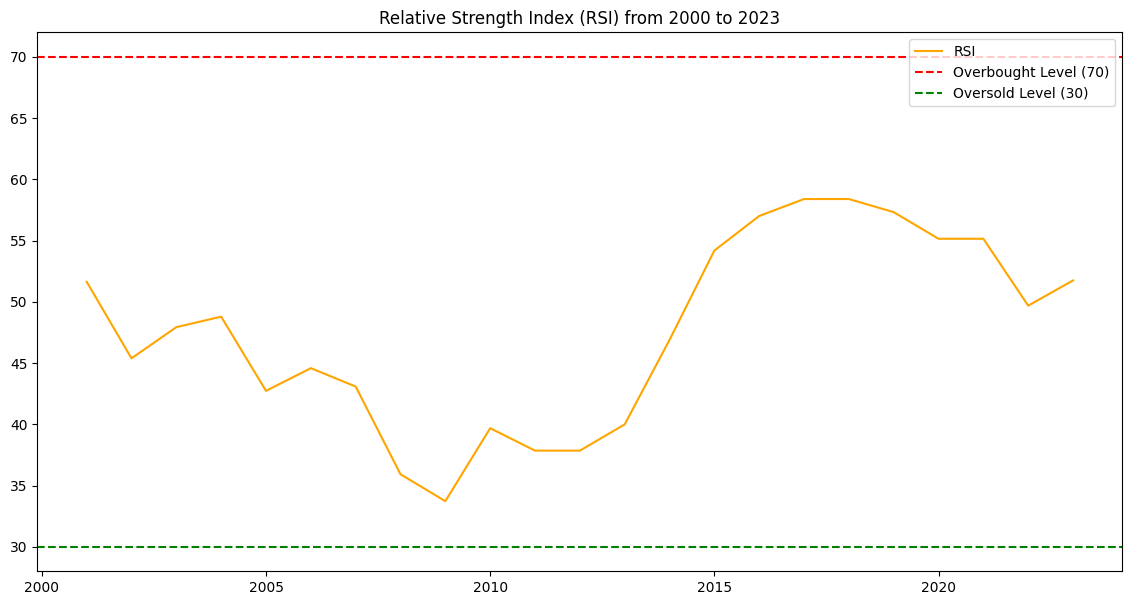

In [14]:
# Define the s1980-12-12tart and end dates for the zoomed-in period
start_date = '2000-12-12'
end_date = '2023-12-01'

# Plot RSI for the specified time period
plt.figure(figsize=(14, 7))
plt.plot(dataAp['RSI'].loc[start_date:end_date], label='RSI', color='orange')
plt.axhline(70, color='red', linestyle='--', label='Overbought Level (70)')
plt.axhline(30, color='green', linestyle='--', label='Oversold Level (30)')
plt.title('Relative Strength Index (RSI) from 2000 to 2023')
plt.legend()
# plt.grid(True)

### Interpretation of the Relative Strength Index (RSI) from 2000 to 2023

The RSI graph over the period from 2000 to 2023 shows the relative strength of the stock without crossing the overbought (70) or oversold (30) levels. This suggests that the stock did not experience extreme buying or selling pressure during this time frame.

1. **Stable Price Movements**: The RSI remains mostly between the 30 and 70 levels, indicating that the stock price movements were relatively stable without reaching extreme overbought or oversold conditions.

2. **Identifying Trends**: The RSI shows fluctuations with periods of rising and falling strength, but these do not reach levels that would typically suggest a strong buy or sell signal. 

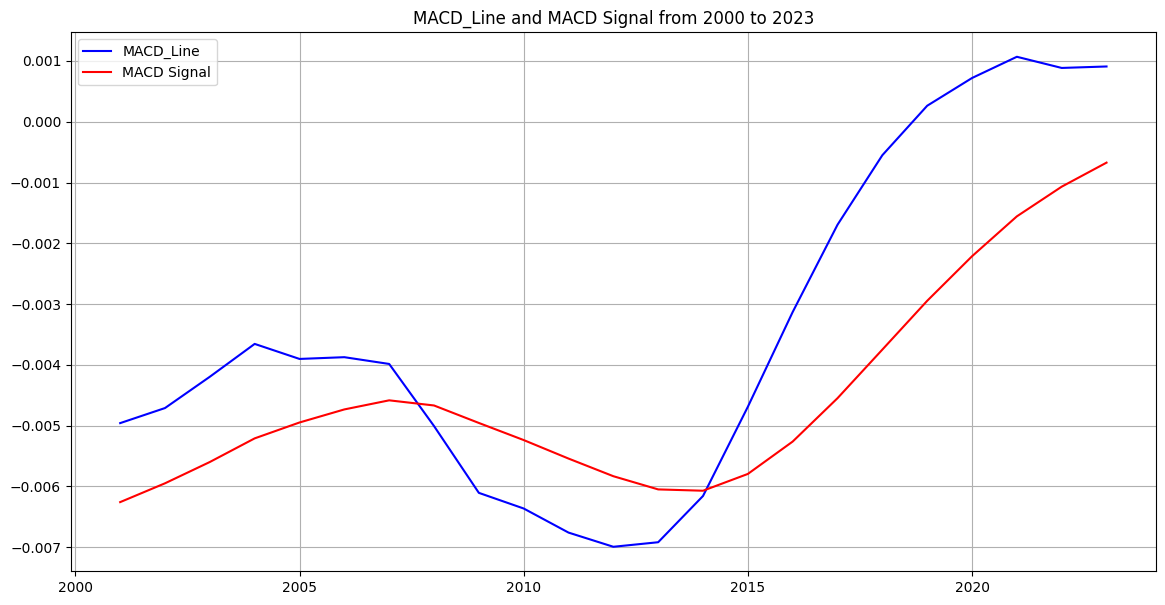

In [15]:
# # Plot MACD
start_date = '2000-06-01'
end_date = '2023-12-01'

# Plot MACD and MACD Signal for the specified date range
plt.figure(figsize=(14, 7))
plt.plot(dataAp['MACD_Line'].loc[start_date:end_date], label='MACD_Line', color='blue', linewidth=1.5)
plt.plot(dataAp['MACD_Signal'].loc[start_date:end_date], label='MACD Signal', color='red', linewidth=1.5)
plt.title('MACD_Line and MACD Signal from 2000 to 2023')
plt.grid(True)
plt.legend()
plt.show()

## Analysis of the 2014 Bullish Crossover
Around 2014, the MACD line crossed above the signal line, followed by an upward trend. This indicates a bullish signal, suggesting a potential increase in the price of the underlying asset.
* **Upward Trend:** The upward trend of both the MACD line and the signal line suggests a potential increase in the asset's price.
* **Strength of Momentum:** The increasing distance between the MACD line and the signal line indicates that the upward momentum is gaining strength.

### Trading Implications:
* **Potential Buy Signal:** This bullish signal  suggest a potential buying opportunity for the asset.

* ## Analysis of the 2008 Bearish Crossover
Around 2008, the MACD line crossed below the signal line, followed by a downward trend. This indicates a bearish signal, suggesting a potential decrease in the price of the underlying asset.
* **Downward Trend:** The downward trend of both the MACD line and the signal line suggests a potential decrease in the asset's price.
* **Strength of Momentum:** The increasing distance between the MACD line and the signal line indicates that the downward momentum is gaining strength.
### Trading Implications:
* **Potential Sell Signal:** This bearish signal might suggest a potential selling opportunity for the asset.

In [107]:
dataAp.to_csv("apple.csv")

## Technical indicator analysis of Amazon company's stock price

In [17]:
dataAm.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,1997-05-15,0.121875,0.125000,0.096354,0.097917,0.097917,1443120000,0.0,0.0
1,1997-05-16,0.098438,0.098958,0.085417,0.086458,0.086458,294000000,0.0,0.0
2,1997-05-19,0.088021,0.088542,0.081250,0.085417,0.085417,122136000,0.0,0.0
3,1997-05-20,0.086458,0.087500,0.081771,0.081771,0.081771,109344000,0.0,0.0
4,1997-05-21,0.081771,0.082292,0.068750,0.071354,0.071354,377064000,0.0,0.0


In [18]:
dataAm["Date"].min()

'1997-05-15'

In [19]:
dataAm.shape

(6846, 9)

In [20]:
dataAm[dataAm.isnull()].sum()

Date              0
Open            0.0
High            0.0
Low             0.0
Close           0.0
Adj Close       0.0
Volume          0.0
Dividends       0.0
Stock Splits    0.0
dtype: object

In [21]:
# Calculate Moving Average
dataAm['SMA_20'] = talib.SMA(dataAm['Close'], timeperiod=20)
dataAm['SMA_50'] = talib.SMA(dataAm['Close'], timeperiod=50)

# Set initial values for SMA_20 and SMA_50
initial_sma_20 = dataAm['Close'].iloc[19]  # Value for the first SMA_20
initial_sma_50 = dataAm['Close'].iloc[49]  # Value for the first SMA_50

# Fill NaN values for SMA_20 and SMA_50 with the initial values
dataAm['SMA_20'] = dataAm['SMA_20'].fillna(initial_sma_20)
dataAm['SMA_50'] = dataAm['SMA_50'].fillna(initial_sma_50)

In [22]:
dataAm

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,SMA_20,SMA_50
0,1997-05-15,0.121875,0.125000,0.096354,0.097917,0.097917,1443120000,0.0,0.0,0.080208,0.111458
1,1997-05-16,0.098438,0.098958,0.085417,0.086458,0.086458,294000000,0.0,0.0,0.080208,0.111458
2,1997-05-19,0.088021,0.088542,0.081250,0.085417,0.085417,122136000,0.0,0.0,0.080208,0.111458
3,1997-05-20,0.086458,0.087500,0.081771,0.081771,0.081771,109344000,0.0,0.0,0.080208,0.111458
4,1997-05-21,0.081771,0.082292,0.068750,0.071354,0.071354,377064000,0.0,0.0,0.080208,0.111458
...,...,...,...,...,...,...,...,...,...,...,...
6841,2024-07-24,183.199997,185.449997,180.410004,180.830002,180.830002,41532400,0.0,0.0,192.890000,187.364001
6842,2024-07-25,182.910004,183.899994,176.800003,179.850006,179.850006,44464200,0.0,0.0,192.202000,187.229601
6843,2024-07-26,180.389999,183.190002,180.240005,182.500000,182.500000,29506000,0.0,0.0,191.434500,187.138200
6844,2024-07-29,183.839996,184.750000,182.380005,183.199997,183.199997,33270100,0.0,0.0,190.932000,187.082400


In [23]:
# Calculate RSI
initial_rsi = dataAm['Close'].iloc[13]
dataAm['RSI'] = talib.RSI(dataAm['Close'], timeperiod=14)
dataAm['RSI'] = dataAm['RSI'].fillna(initial_rsi)

In [24]:
dataAm

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,SMA_20,SMA_50,RSI
0,1997-05-15,0.121875,0.125000,0.096354,0.097917,0.097917,1443120000,0.0,0.0,0.080208,0.111458,0.070833
1,1997-05-16,0.098438,0.098958,0.085417,0.086458,0.086458,294000000,0.0,0.0,0.080208,0.111458,0.070833
2,1997-05-19,0.088021,0.088542,0.081250,0.085417,0.085417,122136000,0.0,0.0,0.080208,0.111458,0.070833
3,1997-05-20,0.086458,0.087500,0.081771,0.081771,0.081771,109344000,0.0,0.0,0.080208,0.111458,0.070833
4,1997-05-21,0.081771,0.082292,0.068750,0.071354,0.071354,377064000,0.0,0.0,0.080208,0.111458,0.070833
...,...,...,...,...,...,...,...,...,...,...,...,...
6841,2024-07-24,183.199997,185.449997,180.410004,180.830002,180.830002,41532400,0.0,0.0,192.890000,187.364001,37.221397
6842,2024-07-25,182.910004,183.899994,176.800003,179.850006,179.850006,44464200,0.0,0.0,192.202000,187.229601,36.132394
6843,2024-07-26,180.389999,183.190002,180.240005,182.500000,182.500000,29506000,0.0,0.0,191.434500,187.138200,41.146719
6844,2024-07-29,183.839996,184.750000,182.380005,183.199997,183.199997,33270100,0.0,0.0,190.932000,187.082400,42.432437


In [25]:
# Calculate MACD
initial_macd_line = dataAm['Close'].iloc[25]
initial_macd_signal = dataAm['Close'].iloc[25]
initial_macd_hist = initial_macd_line - initial_macd_signal
dataAm['MACD_Line'], dataAm['MACD_Signal'], dataAm['MACD_Hist'] = talib.MACD(dataAm['Close'], fastperiod=12, slowperiod=26, signalperiod=9)

dataAm['MACD_Line'] = dataAm['MACD_Line'].fillna(initial_macd_line)
dataAm['MACD_Signal'] = dataAm['MACD_Signal'].fillna(initial_macd_signal)
dataAm['MACD_Hist'] = dataAm['MACD_Hist'].fillna(initial_macd_hist)

In [26]:
dataAm

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,SMA_20,SMA_50,RSI,MACD_Line,MACD_Signal,MACD_Hist
0,1997-05-15,0.121875,0.125000,0.096354,0.097917,0.097917,1443120000,0.0,0.0,0.080208,0.111458,0.070833,0.076302,0.076302,0.000000
1,1997-05-16,0.098438,0.098958,0.085417,0.086458,0.086458,294000000,0.0,0.0,0.080208,0.111458,0.070833,0.076302,0.076302,0.000000
2,1997-05-19,0.088021,0.088542,0.081250,0.085417,0.085417,122136000,0.0,0.0,0.080208,0.111458,0.070833,0.076302,0.076302,0.000000
3,1997-05-20,0.086458,0.087500,0.081771,0.081771,0.081771,109344000,0.0,0.0,0.080208,0.111458,0.070833,0.076302,0.076302,0.000000
4,1997-05-21,0.081771,0.082292,0.068750,0.071354,0.071354,377064000,0.0,0.0,0.080208,0.111458,0.070833,0.076302,0.076302,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6841,2024-07-24,183.199997,185.449997,180.410004,180.830002,180.830002,41532400,0.0,0.0,192.890000,187.364001,37.221397,-1.342010,0.635114,-1.977124
6842,2024-07-25,182.910004,183.899994,176.800003,179.850006,179.850006,44464200,0.0,0.0,192.202000,187.229601,36.132394,-1.878483,0.132395,-2.010878
6843,2024-07-26,180.389999,183.190002,180.240005,182.500000,182.500000,29506000,0.0,0.0,191.434500,187.138200,41.146719,-2.065994,-0.307283,-1.758711
6844,2024-07-29,183.839996,184.750000,182.380005,183.199997,183.199997,33270100,0.0,0.0,190.932000,187.082400,42.432437,-2.133520,-0.672530,-1.460990


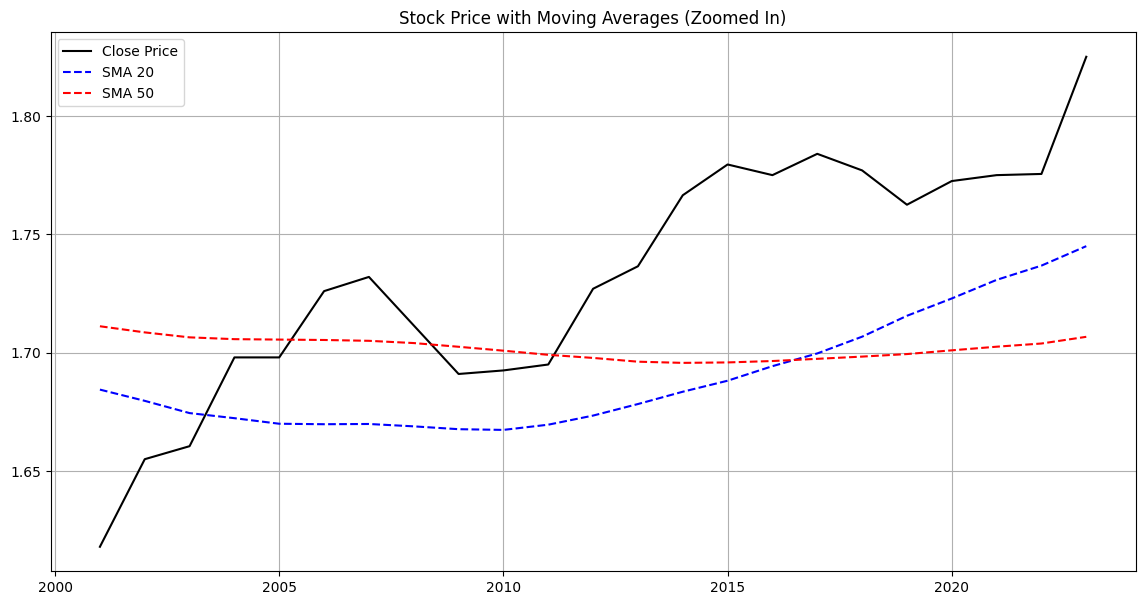

In [27]:
start_date = '2000-06-01'
end_date = '2023-12-01'

plt.figure(figsize=(14, 7))
plt.plot(dataAm['Close'].loc[start_date:end_date], label='Close Price', color='black', linewidth=1.5)
plt.plot(dataAm['SMA_20'].loc[start_date:end_date], label='SMA 20', color='blue', linestyle='--', linewidth=1.5)
plt.plot(dataAm['SMA_50'].loc[start_date:end_date], label='SMA 50', color='red', linestyle='--', linewidth=1.5)

plt.grid(True)
plt.title('Stock Price with Moving Averages')
plt.legend()

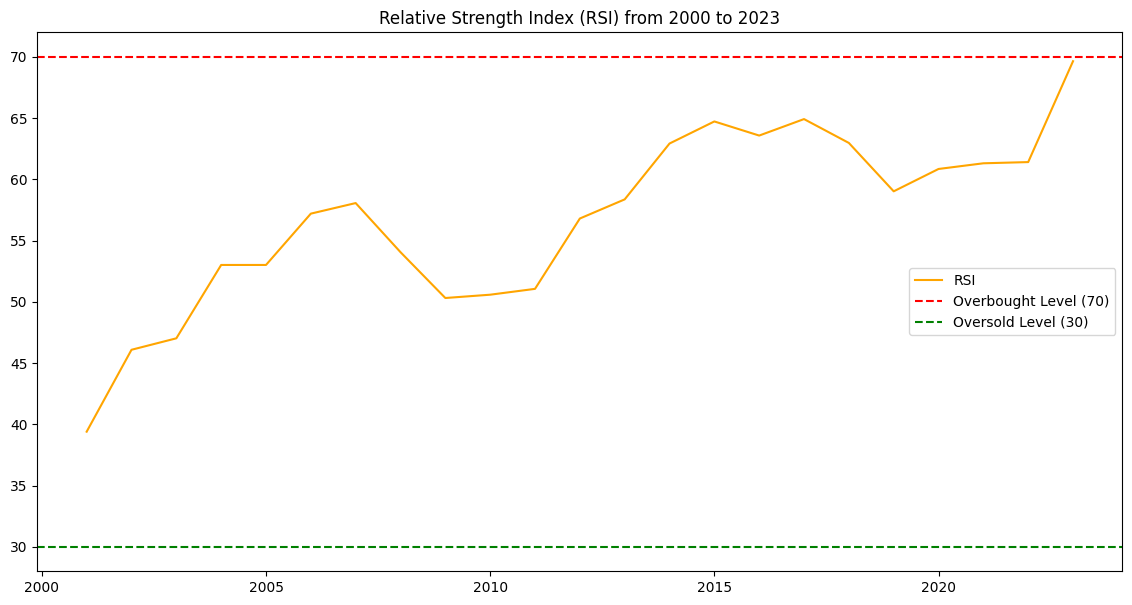

In [28]:
# Define the s1980-12-12tart and end dates for the zoomed-in period
start_date = '2000-12-12'
end_date = '2023-12-01'

# Plot RSI for the specified time period
plt.figure(figsize=(14, 7))
plt.plot(dataAm['RSI'].loc[start_date:end_date], label='RSI', color='orange')
plt.axhline(70, color='red', linestyle='--', label='Overbought Level (70)')
plt.axhline(30, color='green', linestyle='--', label='Oversold Level (30)')
plt.title('Relative Strength Index (RSI) from 2000 to 2023')
plt.legend()
# plt.grid(True)

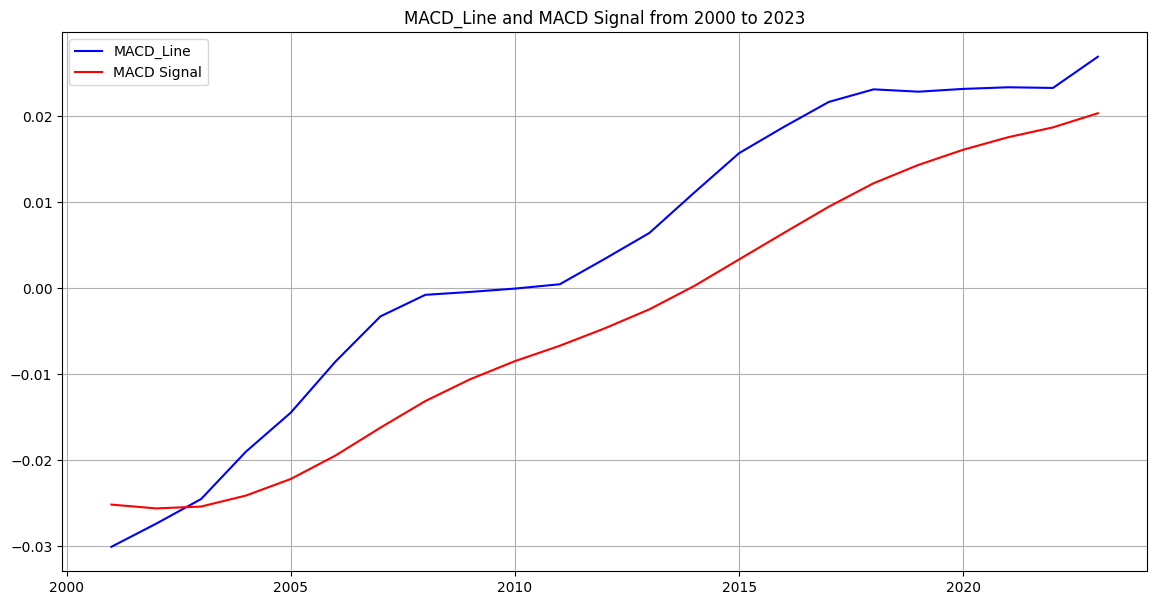

In [29]:
# # Plot MACD
start_date = '2000-06-01'
end_date = '2023-12-01'

# Plot MACD and MACD Signal for the specified date range
plt.figure(figsize=(14, 7))
plt.plot(dataAm['MACD_Line'].loc[start_date:end_date], label='MACD_Line', color='blue', linewidth=1.5)
plt.plot(dataAm['MACD_Signal'].loc[start_date:end_date], label='MACD Signal', color='red', linewidth=1.5)
plt.title('MACD_Line and MACD Signal from 2000 to 2023')
plt.grid(True)
plt.legend()

In [108]:
dataAp.to_csv("amazon.csv")

## Technical indicator analysis of Google company's stock price

In [30]:
dataGo.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,2004-08-19,2.490664,2.591785,2.390042,2.499133,2.496292,897427216,0.0,0.0
1,2004-08-20,2.515820,2.716817,2.503118,2.697639,2.694573,458857488,0.0,0.0
2,2004-08-23,2.758411,2.826406,2.716070,2.724787,2.721690,366857939,0.0,0.0
3,2004-08-24,2.770615,2.779581,2.579581,2.611960,2.608991,306396159,0.0,0.0
4,2004-08-25,2.614201,2.689918,2.587302,2.640104,2.637103,184645512,0.0,0.0


In [31]:
dataGo["Date"].min()

'2004-08-19'

In [32]:
dataGo.shape

(5020, 9)

In [33]:
dataGo[dataAp.isnull()].sum()

Date              0
Open            0.0
High            0.0
Low             0.0
Close           0.0
Adj Close       0.0
Volume          0.0
Dividends       0.0
Stock Splits    0.0
dtype: object

In [34]:
# Calculate Moving Average
dataGo['SMA_20'] = talib.SMA(dataGo['Close'], timeperiod=20)
dataGo['SMA_50'] = talib.SMA(dataGo['Close'], timeperiod=50)

# Set initial values for SMA_20 and SMA_50
initial_sma_20 = dataGo['Close'].iloc[19]  # Value for the first SMA_20
initial_sma_50 = dataGo['Close'].iloc[49]  # Value for the first SMA_50

# Fill NaN values for SMA_20 and SMA_50 with the initial values
dataGo['SMA_20'] = dataGo['SMA_20'].fillna(initial_sma_20)
dataGo['SMA_50'] = dataGo['SMA_50'].fillna(initial_sma_50)

In [35]:
dataGo

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,SMA_20,SMA_50
0,2004-08-19,2.490664,2.591785,2.390042,2.499133,2.496292,897427216,0.0,0.0,2.838610,4.814454
1,2004-08-20,2.515820,2.716817,2.503118,2.697639,2.694573,458857488,0.0,0.0,2.838610,4.814454
2,2004-08-23,2.758411,2.826406,2.716070,2.724787,2.721690,366857939,0.0,0.0,2.838610,4.814454
3,2004-08-24,2.770615,2.779581,2.579581,2.611960,2.608991,306396159,0.0,0.0,2.838610,4.814454
4,2004-08-25,2.614201,2.689918,2.587302,2.640104,2.637103,184645512,0.0,0.0,2.838610,4.814454
...,...,...,...,...,...,...,...,...,...,...,...
5015,2024-07-24,175.389999,177.949997,173.570007,174.369995,174.369995,31250700,0.0,0.0,185.500001,180.394800
5016,2024-07-25,174.250000,175.199997,169.050003,169.160004,169.160004,28967900,0.0,0.0,184.689501,180.360000
5017,2024-07-26,168.770004,169.839996,165.865005,168.679993,168.679993,25150100,0.0,0.0,183.780501,180.295000
5018,2024-07-29,170.500000,172.160004,169.720001,171.130005,171.130005,13768900,0.0,0.0,183.166001,180.240000


In [36]:
# Calculate RSI
initial_rsi = dataGo['Close'].iloc[13]
dataGo['RSI'] = talib.RSI(dataGo['Close'], timeperiod=14)
dataGo['RSI'] = dataGo['RSI'].fillna(initial_rsi)

In [37]:
dataGo

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,SMA_20,SMA_50,RSI
0,2004-08-19,2.490664,2.591785,2.390042,2.499133,2.496292,897427216,0.0,0.0,2.838610,4.814454,2.547950
1,2004-08-20,2.515820,2.716817,2.503118,2.697639,2.694573,458857488,0.0,0.0,2.838610,4.814454,2.547950
2,2004-08-23,2.758411,2.826406,2.716070,2.724787,2.721690,366857939,0.0,0.0,2.838610,4.814454,2.547950
3,2004-08-24,2.770615,2.779581,2.579581,2.611960,2.608991,306396159,0.0,0.0,2.838610,4.814454,2.547950
4,2004-08-25,2.614201,2.689918,2.587302,2.640104,2.637103,184645512,0.0,0.0,2.838610,4.814454,2.547950
...,...,...,...,...,...,...,...,...,...,...,...,...
5015,2024-07-24,175.389999,177.949997,173.570007,174.369995,174.369995,31250700,0.0,0.0,185.500001,180.394800,37.434718
5016,2024-07-25,174.250000,175.199997,169.050003,169.160004,169.160004,28967900,0.0,0.0,184.689501,180.360000,32.279082
5017,2024-07-26,168.770004,169.839996,165.865005,168.679993,168.679993,25150100,0.0,0.0,183.780501,180.295000,31.843937
5018,2024-07-29,170.500000,172.160004,169.720001,171.130005,171.130005,13768900,0.0,0.0,183.166001,180.240000,36.545844


In [38]:
# Calculate MACD
initial_macd_line = dataGo['Close'].iloc[25]
initial_macd_signal = dataGo['Close'].iloc[25]
initial_macd_hist = initial_macd_line - initial_macd_signal
dataGo['MACD_Line'], dataGo['MACD_Signal'], dataGo['MACD_Hist'] = talib.MACD(dataGo['Close'], fastperiod=12, slowperiod=26, signalperiod=9)

dataGo['MACD_Line'] = dataGo['MACD_Line'].fillna(initial_macd_line)
dataGo['MACD_Signal'] = dataGo['MACD_Signal'].fillna(initial_macd_signal)
dataGo['MACD_Hist'] = dataGo['MACD_Hist'].fillna(initial_macd_hist)

In [39]:
dataGo

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,SMA_20,SMA_50,RSI,MACD_Line,MACD_Signal,MACD_Hist
0,2004-08-19,2.490664,2.591785,2.390042,2.499133,2.496292,897427216,0.0,0.0,2.838610,4.814454,2.547950,2.984563,2.984563,0.000000
1,2004-08-20,2.515820,2.716817,2.503118,2.697639,2.694573,458857488,0.0,0.0,2.838610,4.814454,2.547950,2.984563,2.984563,0.000000
2,2004-08-23,2.758411,2.826406,2.716070,2.724787,2.721690,366857939,0.0,0.0,2.838610,4.814454,2.547950,2.984563,2.984563,0.000000
3,2004-08-24,2.770615,2.779581,2.579581,2.611960,2.608991,306396159,0.0,0.0,2.838610,4.814454,2.547950,2.984563,2.984563,0.000000
4,2004-08-25,2.614201,2.689918,2.587302,2.640104,2.637103,184645512,0.0,0.0,2.838610,4.814454,2.547950,2.984563,2.984563,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5015,2024-07-24,175.389999,177.949997,173.570007,174.369995,174.369995,31250700,0.0,0.0,185.500001,180.394800,37.434718,-0.034166,1.571016,-1.605182
5016,2024-07-25,174.250000,175.199997,169.050003,169.160004,169.160004,28967900,0.0,0.0,184.689501,180.360000,32.279082,-1.106693,1.035474,-2.142167
5017,2024-07-26,168.770004,169.839996,165.865005,168.679993,168.679993,25150100,0.0,0.0,183.780501,180.295000,31.843937,-1.972672,0.433845,-2.406517
5018,2024-07-29,170.500000,172.160004,169.720001,171.130005,171.130005,13768900,0.0,0.0,183.166001,180.240000,36.545844,-2.433223,-0.139569,-2.293654


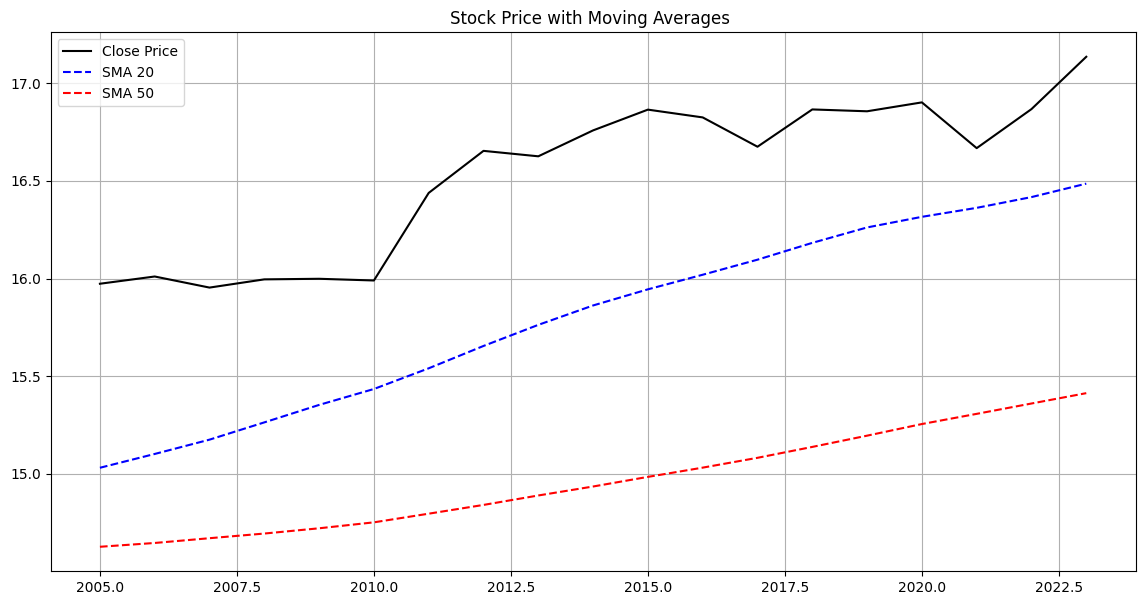

In [104]:
start_date = '2004-06-01'
end_date = '2023-12-01'

plt.figure(figsize=(14, 7))
plt.plot(dataGo['Close'].loc[start_date:end_date], label='Close Price', color='black', linewidth=1.5)
plt.plot(dataGo['SMA_20'].loc[start_date:end_date], label='SMA 20', color='blue', linestyle='--', linewidth=1.5)
plt.plot(dataGo['SMA_50'].loc[start_date:end_date], label='SMA 50', color='red', linestyle='--', linewidth=1.5)

plt.grid(True)
plt.title('Stock Price with Moving Averages ')
plt.legend()

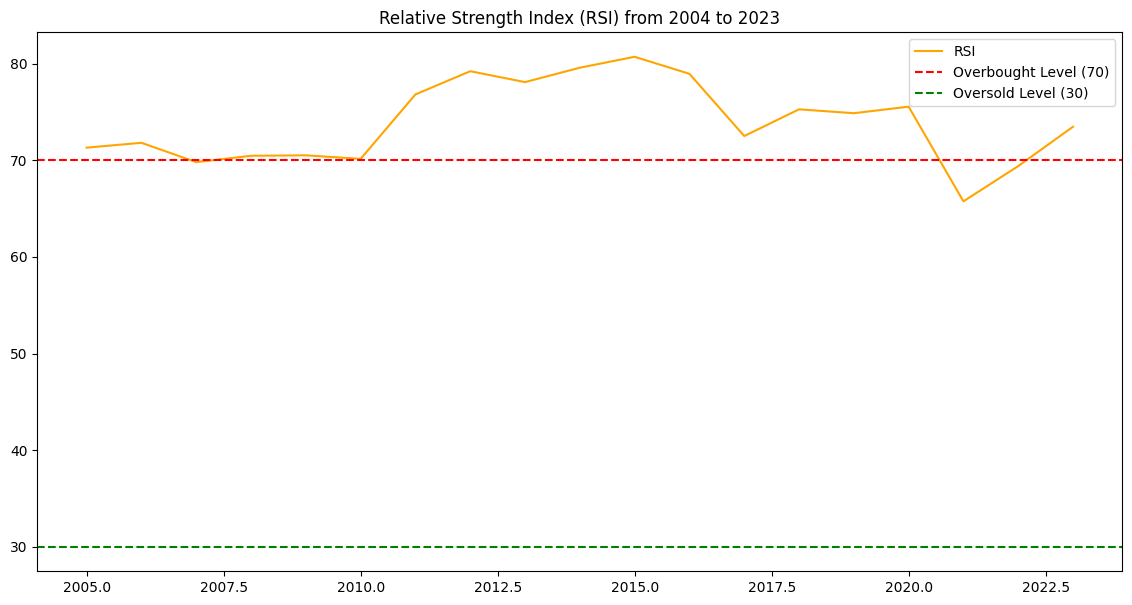

In [105]:
# Define the s1980-12-12tart and end dates for the zoomed-in period
start_date = '2004-12-12'
end_date = '2023-12-01'

# Plot RSI for the specified time period
plt.figure(figsize=(14, 7))
plt.plot(dataGo['RSI'].loc[start_date:end_date], label='RSI', color='orange')
plt.axhline(70, color='red', linestyle='--', label='Overbought Level (70)')
plt.axhline(30, color='green', linestyle='--', label='Oversold Level (30)')
plt.title('Relative Strength Index (RSI) from 2004 to 2023')
plt.legend()

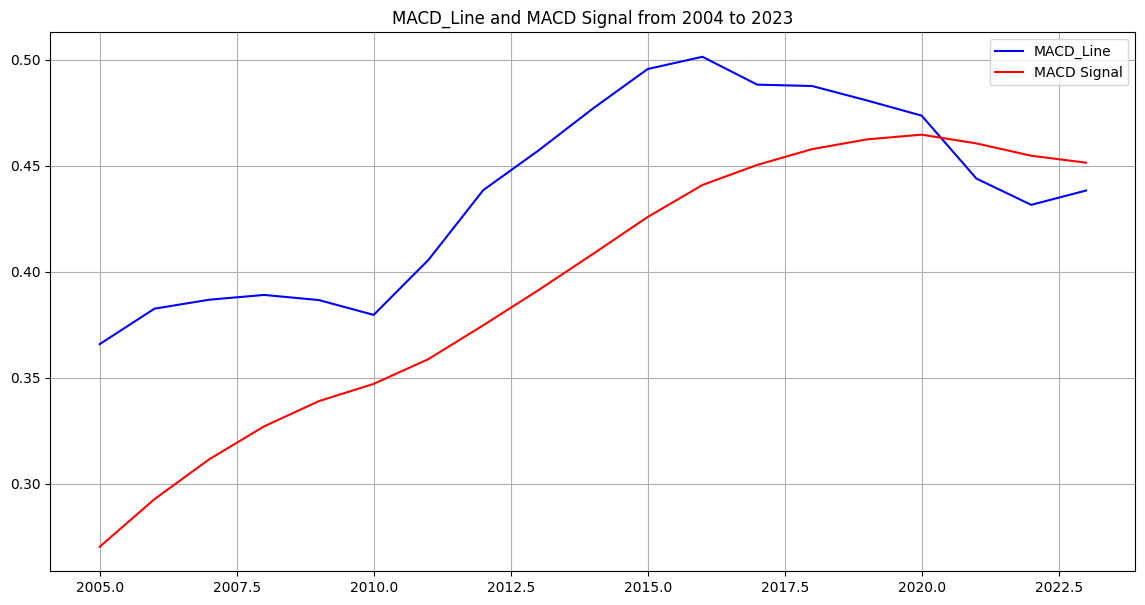

In [106]:
# # Plot MACD
start_date = '2004-06-01'
end_date = '2023-12-01'

# Plot MACD and MACD Signal for the specified date range
plt.figure(figsize=(14, 7))
plt.plot(dataGo['MACD_Line'].loc[start_date:end_date], label='MACD_Line', color='blue', linewidth=1.5)
plt.plot(dataGo['MACD_Signal'].loc[start_date:end_date], label='MACD Signal', color='red', linewidth=1.5)
plt.title('MACD_Line and MACD Signal from 2004 to 2023')
plt.grid(True)
plt.legend()

In [109]:
dataAp.to_csv("google.csv")

## Technical indicator analysis of Meta company's stock price

In [43]:
dataMe.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,2012-12-12,28.000000,28.139999,27.370001,27.580000,27.523441,46704200,0.0,0.0
1,2012-12-13,27.590000,28.750000,27.430000,28.240000,28.182087,81051600,0.0,0.0
2,2012-12-14,28.180000,28.330000,26.760000,26.809999,26.755020,91631600,0.0,0.0
3,2012-12-17,26.770000,27.000000,26.320000,26.750000,26.695143,57742500,0.0,0.0
4,2012-12-18,26.959999,27.910000,26.900000,27.709999,27.653173,60512900,0.0,0.0


In [44]:
dataMe["Date"].min()

'2012-12-12'

In [45]:
dataMe.shape

(2926, 9)

In [46]:
dataMe[dataMe.isnull()].sum()

Date              0
Open            0.0
High            0.0
Low             0.0
Close           0.0
Adj Close       0.0
Volume          0.0
Dividends       0.0
Stock Splits    0.0
dtype: object

In [47]:
# Calculate Moving Average
dataMe['SMA_20'] = talib.SMA(dataMe['Close'], timeperiod=20)
dataMe['SMA_50'] = talib.SMA(dataMe['Close'], timeperiod=50)

# Set initial values for SMA_20 and SMA_50
initial_sma_20 = dataMe['Close'].iloc[19]  # Value for the first SMA_20
initial_sma_50 = dataMe['Close'].iloc[49]  # Value for the first SMA_50

# Fill NaN values for SMA_20 and SMA_50 with the initial values
dataMe['SMA_20'] = dataMe['SMA_20'].fillna(initial_sma_20)
dataMe['SMA_50'] = dataMe['SMA_50'].fillna(initial_sma_50)

In [48]:
dataMe

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,SMA_20,SMA_50
0,2012-12-12,28.000000,28.139999,27.370001,27.580000,27.523441,46704200,0.0,0.0,31.299999,27.270000
1,2012-12-13,27.590000,28.750000,27.430000,28.240000,28.182087,81051600,0.0,0.0,31.299999,27.270000
2,2012-12-14,28.180000,28.330000,26.760000,26.809999,26.755020,91631600,0.0,0.0,31.299999,27.270000
3,2012-12-17,26.770000,27.000000,26.320000,26.750000,26.695143,57742500,0.0,0.0,31.299999,27.270000
4,2012-12-18,26.959999,27.910000,26.900000,27.709999,27.653173,60512900,0.0,0.0,31.299999,27.270000
...,...,...,...,...,...,...,...,...,...,...,...
2921,2024-07-24,472.309998,476.299988,460.579987,461.269989,461.269989,17649700,0.0,0.0,502.223499,492.399200
2922,2024-07-25,463.260010,463.549988,442.649994,453.410004,453.410004,18240500,0.0,0.0,499.237999,492.107200
2923,2024-07-26,464.200012,469.769989,459.420013,465.700012,465.700012,14222400,0.0,0.0,496.545000,491.984200
2924,2024-07-29,469.880005,473.959991,465.019989,465.709991,465.709991,11339600,0.0,0.0,494.619499,491.667599


In [49]:
# Calculate RSI
initial_rsi = dataMe['Close'].iloc[13]
dataMe['RSI'] = talib.RSI(dataMe['Close'], timeperiod=14)
dataMe['RSI'] = dataMe['RSI'].fillna(initial_rsi)

In [50]:
dataMe

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,SMA_20,SMA_50,RSI
0,2012-12-12,28.000000,28.139999,27.370001,27.580000,27.523441,46704200,0.0,0.0,31.299999,27.270000,28.000000
1,2012-12-13,27.590000,28.750000,27.430000,28.240000,28.182087,81051600,0.0,0.0,31.299999,27.270000,28.000000
2,2012-12-14,28.180000,28.330000,26.760000,26.809999,26.755020,91631600,0.0,0.0,31.299999,27.270000,28.000000
3,2012-12-17,26.770000,27.000000,26.320000,26.750000,26.695143,57742500,0.0,0.0,31.299999,27.270000,28.000000
4,2012-12-18,26.959999,27.910000,26.900000,27.709999,27.653173,60512900,0.0,0.0,31.299999,27.270000,28.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
2921,2024-07-24,472.309998,476.299988,460.579987,461.269989,461.269989,17649700,0.0,0.0,502.223499,492.399200,36.964279
2922,2024-07-25,463.260010,463.549988,442.649994,453.410004,453.410004,18240500,0.0,0.0,499.237999,492.107200,34.814669
2923,2024-07-26,464.200012,469.769989,459.420013,465.700012,465.700012,14222400,0.0,0.0,496.545000,491.984200,40.628601
2924,2024-07-29,469.880005,473.959991,465.019989,465.709991,465.709991,11339600,0.0,0.0,494.619499,491.667599,40.633231


In [51]:
# Calculate MACD
initial_macd_line = dataMe['Close'].iloc[25]
initial_macd_signal = dataMe['Close'].iloc[25]
initial_macd_hist = initial_macd_line - initial_macd_signal
dataMe['MACD_Line'], dataMe['MACD_Signal'], dataMe['MACD_Hist'] = talib.MACD(dataMe['Close'], fastperiod=12, slowperiod=26, signalperiod=9)

dataMe['MACD_Line'] = dataMe['MACD_Line'].fillna(initial_macd_line)
dataMe['MACD_Signal'] = dataMe['MACD_Signal'].fillna(initial_macd_signal)
dataMe['MACD_Hist'] = dataMe['MACD_Hist'].fillna(initial_macd_hist)

In [52]:
dataMe

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,SMA_20,SMA_50,RSI,MACD_Line,MACD_Signal,MACD_Hist
0,2012-12-12,28.000000,28.139999,27.370001,27.580000,27.523441,46704200,0.0,0.0,31.299999,27.270000,28.000000,29.660000,29.660000,0.000000
1,2012-12-13,27.590000,28.750000,27.430000,28.240000,28.182087,81051600,0.0,0.0,31.299999,27.270000,28.000000,29.660000,29.660000,0.000000
2,2012-12-14,28.180000,28.330000,26.760000,26.809999,26.755020,91631600,0.0,0.0,31.299999,27.270000,28.000000,29.660000,29.660000,0.000000
3,2012-12-17,26.770000,27.000000,26.320000,26.750000,26.695143,57742500,0.0,0.0,31.299999,27.270000,28.000000,29.660000,29.660000,0.000000
4,2012-12-18,26.959999,27.910000,26.900000,27.709999,27.653173,60512900,0.0,0.0,31.299999,27.270000,28.000000,29.660000,29.660000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2921,2024-07-24,472.309998,476.299988,460.579987,461.269989,461.269989,17649700,0.0,0.0,502.223499,492.399200,36.964279,-6.550694,-1.274374,-5.276320
2922,2024-07-25,463.260010,463.549988,442.649994,453.410004,453.410004,18240500,0.0,0.0,499.237999,492.107200,34.814669,-8.810746,-2.781648,-6.029098
2923,2024-07-26,464.200012,469.769989,459.420013,465.700012,465.700012,14222400,0.0,0.0,496.545000,491.984200,40.628601,-9.500635,-4.125446,-5.375189
2924,2024-07-29,469.880005,473.959991,465.019989,465.709991,465.709991,11339600,0.0,0.0,494.619499,491.667599,40.633231,-9.932081,-5.286773,-4.645308


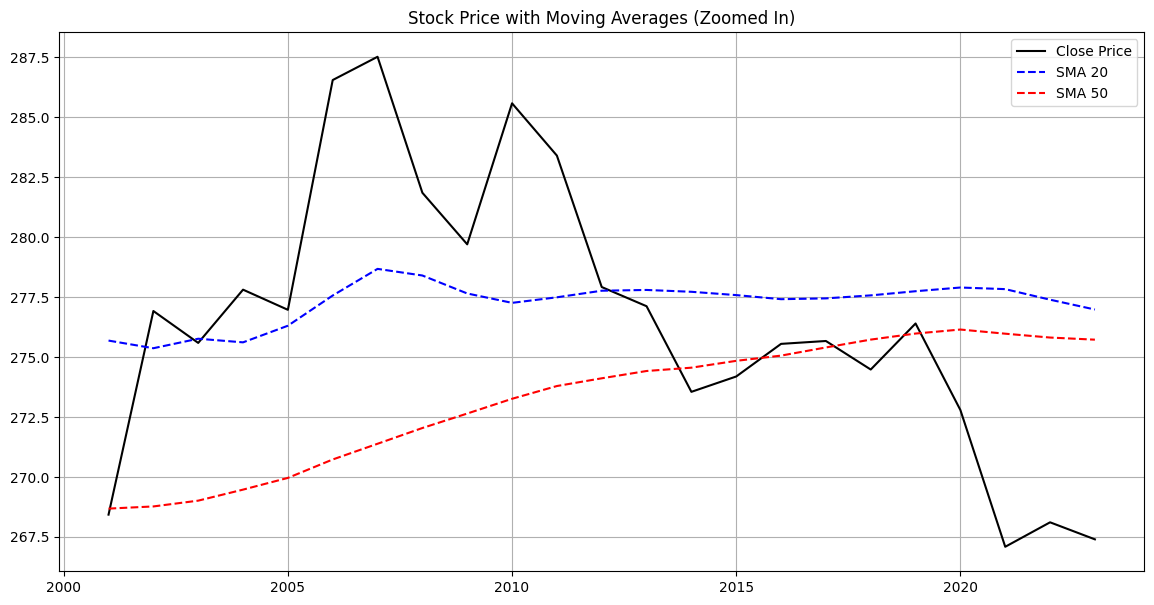

In [53]:
start_date = '2012-06-01'
end_date = '2023-12-01'

plt.figure(figsize=(14, 7))
plt.plot(dataMe['Close'].loc[start_date:end_date], label='Close Price', color='black', linewidth=1.5)
plt.plot(dataMe['SMA_20'].loc[start_date:end_date], label='SMA 20', color='blue', linestyle='--', linewidth=1.5)
plt.plot(dataMe['SMA_50'].loc[start_date:end_date], label='SMA 50', color='red', linestyle='--', linewidth=1.5)

plt.grid(True)
plt.title('Stock Price with Moving Averages')
plt.legend()

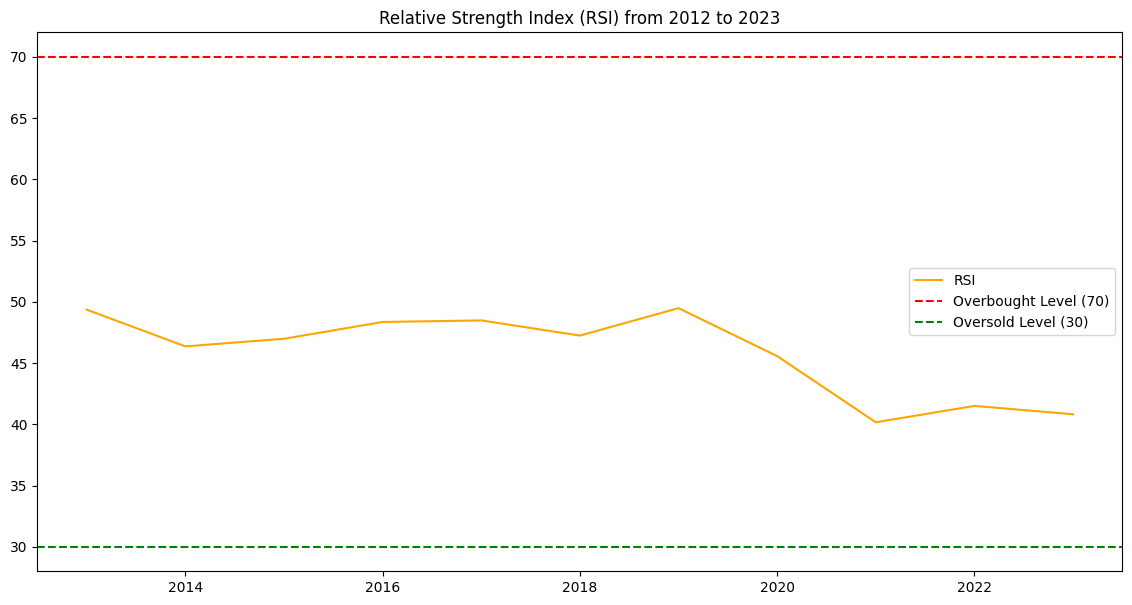

In [103]:
# Define the s1980-12-12tart and end dates for the zoomed-in period
start_date = '2012-12-12'
end_date = '2023-12-01'

# Plot RSI for the specified time period
plt.figure(figsize=(14, 7))
plt.plot(dataMe['RSI'].loc[start_date:end_date], label='RSI', color='orange')
plt.axhline(70, color='red', linestyle='--', label='Overbought Level (70)')
plt.axhline(30, color='green', linestyle='--', label='Oversold Level (30)')
plt.title('Relative Strength Index (RSI) from 2012 to 2023')
plt.legend()

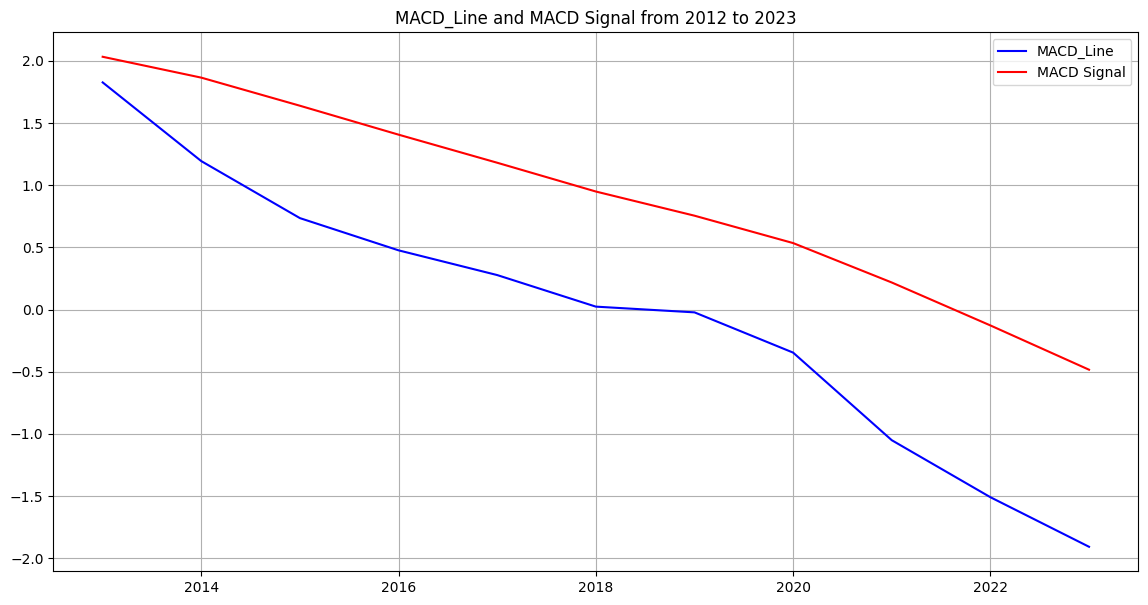

In [102]:
# # Plot MACD
start_date = '2012-06-01'
end_date = '2023-12-01'

# Plot MACD and MACD Signal for the specified date range
plt.figure(figsize=(14, 7))
plt.plot(dataMe['MACD_Line'].loc[start_date:end_date], label='MACD_Line', color='blue', linewidth=1.5)
plt.plot(dataMe['MACD_Signal'].loc[start_date:end_date], label='MACD Signal', color='red', linewidth=1.5)
plt.title('MACD_Line and MACD Signal from 2012 to 2023')
plt.grid(True)
plt.legend()
plt.show()

In [110]:
dataAp.to_csv("meta.csv")

## Technical indicator analysis of Microsoft company's stock price

In [56]:
dataMs.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.059946,1031788800,0.0,0.0
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.062087,308160000,0.0,0.0
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.063158,133171200,0.0,0.0
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.061552,67766400,0.0,0.0
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.060482,47894400,0.0,0.0


In [57]:
dataMs["Date"].min()

'1986-03-13'

In [58]:
dataMs.shape

(9672, 9)

In [59]:
dataMs[dataAp.isnull()].sum()

Date              0
Open            0.0
High            0.0
Low             0.0
Close           0.0
Adj Close       0.0
Volume          0.0
Dividends       0.0
Stock Splits    0.0
dtype: object

In [60]:
# Calculate Moving Average
dataMs['SMA_20'] = talib.SMA(dataMs['Close'], timeperiod=20)
dataMs['SMA_50'] = talib.SMA(dataMs['Close'], timeperiod=50)

# Set initial values for SMA_20 and SMA_50
initial_sma_20 = dataMs['Close'].iloc[19]  # Value for the first SMA_20
initial_sma_50 = dataMs['Close'].iloc[49]  # Value for the first SMA_50

# Fill NaN values for SMA_20 and SMA_50 with the initial values
dataMs['SMA_20'] = dataMs['SMA_20'].fillna(initial_sma_20)
dataMs['SMA_50'] = dataMs['SMA_50'].fillna(initial_sma_50)

In [61]:
dataMs

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,SMA_20,SMA_50
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.059946,1031788800,0.0,0.0,0.098090,0.107639
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.062087,308160000,0.0,0.0,0.098090,0.107639
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.063158,133171200,0.0,0.0,0.098090,0.107639
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.061552,67766400,0.0,0.0,0.098090,0.107639
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.060482,47894400,0.0,0.0,0.098090,0.107639
...,...,...,...,...,...,...,...,...,...,...,...
9667,2024-07-24,440.450012,441.480011,427.589996,428.899994,428.128326,26805800,0.0,0.0,451.887498,438.804000
9668,2024-07-25,428.799988,429.799988,417.510010,418.399994,417.647217,29943800,0.0,0.0,450.199498,438.897599
9669,2024-07-26,418.200012,428.920013,417.269989,425.269989,424.504852,23583800,0.0,0.0,448.820497,439.071799
9670,2024-07-29,431.579987,432.149994,424.700012,426.730011,425.962250,15125800,0.0,0.0,447.809497,439.144800


In [62]:
# Calculate RSI
initial_rsi = dataMs['Close'].iloc[13]
dataMs['RSI'] = talib.RSI(dataMs['Close'], timeperiod=14)
dataMs['RSI'] = dataMs['RSI'].fillna(initial_rsi)

In [63]:
dataMs

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,SMA_20,SMA_50,RSI
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.059946,1031788800,0.0,0.0,0.098090,0.107639,0.095486
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.062087,308160000,0.0,0.0,0.098090,0.107639,0.095486
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.063158,133171200,0.0,0.0,0.098090,0.107639,0.095486
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.061552,67766400,0.0,0.0,0.098090,0.107639,0.095486
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.060482,47894400,0.0,0.0,0.098090,0.107639,0.095486
...,...,...,...,...,...,...,...,...,...,...,...,...
9667,2024-07-24,440.450012,441.480011,427.589996,428.899994,428.128326,26805800,0.0,0.0,451.887498,438.804000,36.980921
9668,2024-07-25,428.799988,429.799988,417.510010,418.399994,417.647217,29943800,0.0,0.0,450.199498,438.897599,31.696381
9669,2024-07-26,418.200012,428.920013,417.269989,425.269989,424.504852,23583800,0.0,0.0,448.820497,439.071799,37.944660
9670,2024-07-29,431.579987,432.149994,424.700012,426.730011,425.962250,15125800,0.0,0.0,447.809497,439.144800,39.217239


In [66]:
# Calculate MACD
initial_macd_line = dataMs['Close'].iloc[25]
initial_macd_signal = dataMs['Close'].iloc[25]
initial_macd_hist = initial_macd_line - initial_macd_signal
dataMs['MACD_Line'], dataMs['MACD_Signal'], dataMs['MACD_Hist'] = talib.MACD(dataMs['Close'], fastperiod=12, slowperiod=26, signalperiod=9)

dataMs['MACD_Line'] = dataMs['MACD_Line'].fillna(initial_macd_line)
dataMs['MACD_Signal'] = dataMs['MACD_Signal'].fillna(initial_macd_signal)
dataMs['MACD_Hist'] = dataMs['MACD_Hist'].fillna(initial_macd_hist)

In [67]:
dataMs

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,SMA_20,SMA_50,RSI,MACD_Signal,MACD_Hist,MACD_Line
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.059946,1031788800,0.0,0.0,0.098090,0.107639,0.095486,0.101563,0.000000,0.101563
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.062087,308160000,0.0,0.0,0.098090,0.107639,0.095486,0.101563,0.000000,0.101563
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.063158,133171200,0.0,0.0,0.098090,0.107639,0.095486,0.101563,0.000000,0.101563
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.061552,67766400,0.0,0.0,0.098090,0.107639,0.095486,0.101563,0.000000,0.101563
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.060482,47894400,0.0,0.0,0.098090,0.107639,0.095486,0.101563,0.000000,0.101563
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9667,2024-07-24,440.450012,441.480011,427.589996,428.899994,428.128326,26805800,0.0,0.0,451.887498,438.804000,36.980921,3.013510,-3.698496,-0.684986
9668,2024-07-25,428.799988,429.799988,417.510010,418.399994,417.647217,29943800,0.0,0.0,450.199498,438.897599,31.696381,1.862718,-4.603171,-2.740453
9669,2024-07-26,418.200012,428.920013,417.269989,425.269989,424.504852,23583800,0.0,0.0,448.820497,439.071799,37.944660,0.735855,-4.507452,-3.771598
9670,2024-07-29,431.579987,432.149994,424.700012,426.730011,425.962250,15125800,0.0,0.0,447.809497,439.144800,39.217239,-0.295321,-4.124703,-4.420024


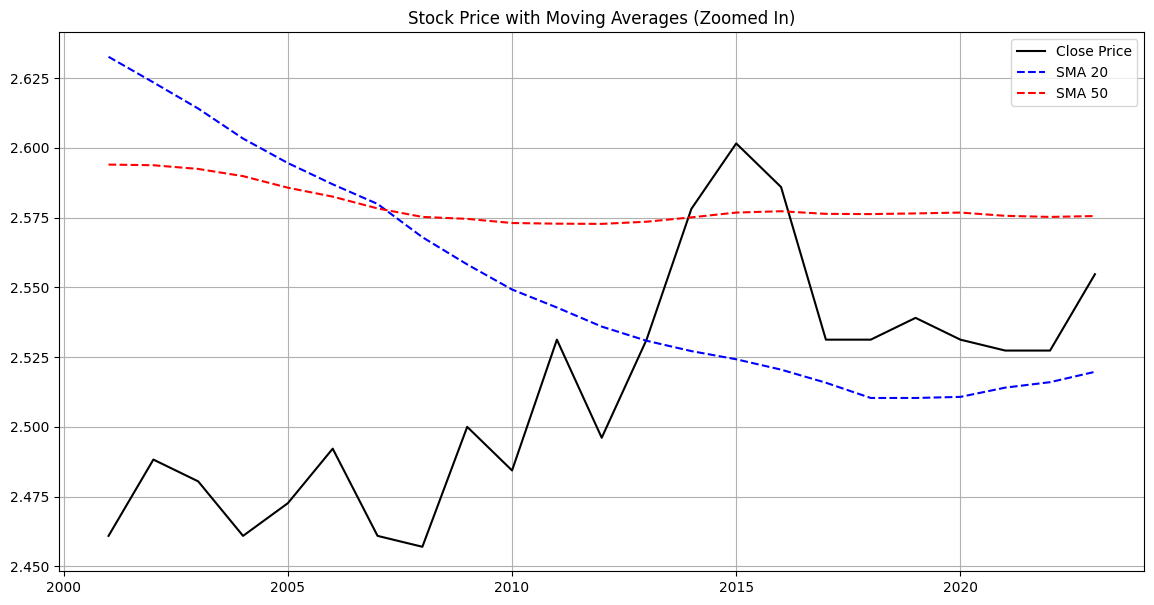

In [68]:
start_date = '2000-06-01'
end_date = '2023-12-01'

plt.figure(figsize=(14, 7))
plt.plot(dataMs['Close'].loc[start_date:end_date], label='Close Price', color='black', linewidth=1.5)
plt.plot(dataMs['SMA_20'].loc[start_date:end_date], label='SMA 20', color='blue', linestyle='--', linewidth=1.5)
plt.plot(dataMs['SMA_50'].loc[start_date:end_date], label='SMA 50', color='red', linestyle='--', linewidth=1.5)

plt.grid(True)
plt.title('Stock Price with Moving Averages (Zoomed In)')
plt.legend()
plt.show()

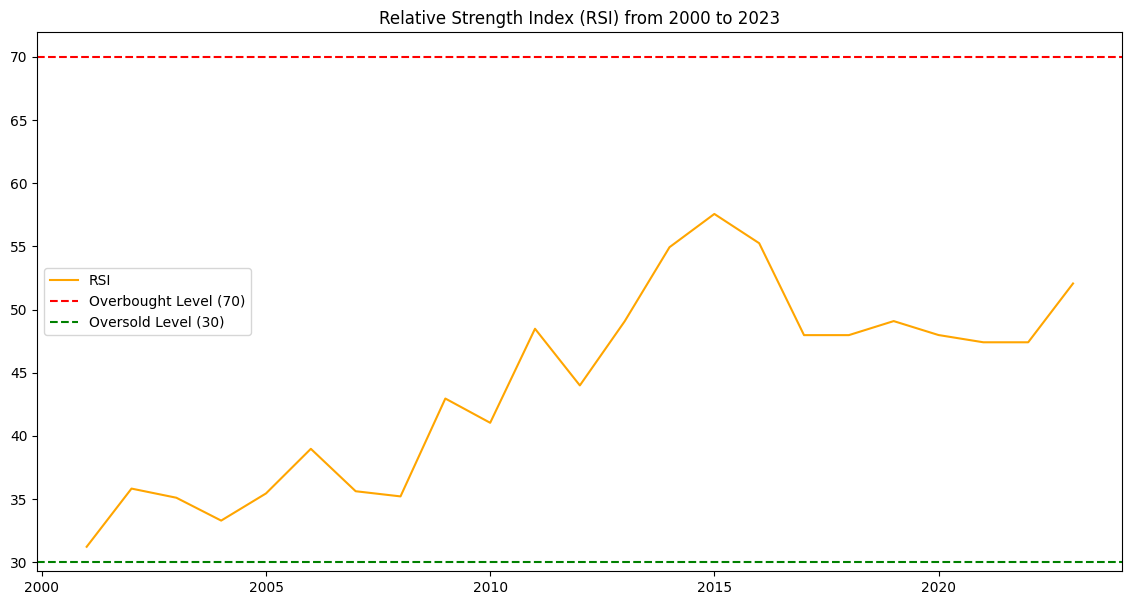

In [69]:
# Define the s1980-12-12tart and end dates for the zoomed-in period
start_date = '2000-12-12'
end_date = '2023-12-01'

# Plot RSI for the specified time period
plt.figure(figsize=(14, 7))
plt.plot(dataMs['RSI'].loc[start_date:end_date], label='RSI', color='orange')
plt.axhline(70, color='red', linestyle='--', label='Overbought Level (70)')
plt.axhline(30, color='green', linestyle='--', label='Oversold Level (30)')
plt.title('Relative Strength Index (RSI) from 2000 to 2023')
plt.legend()

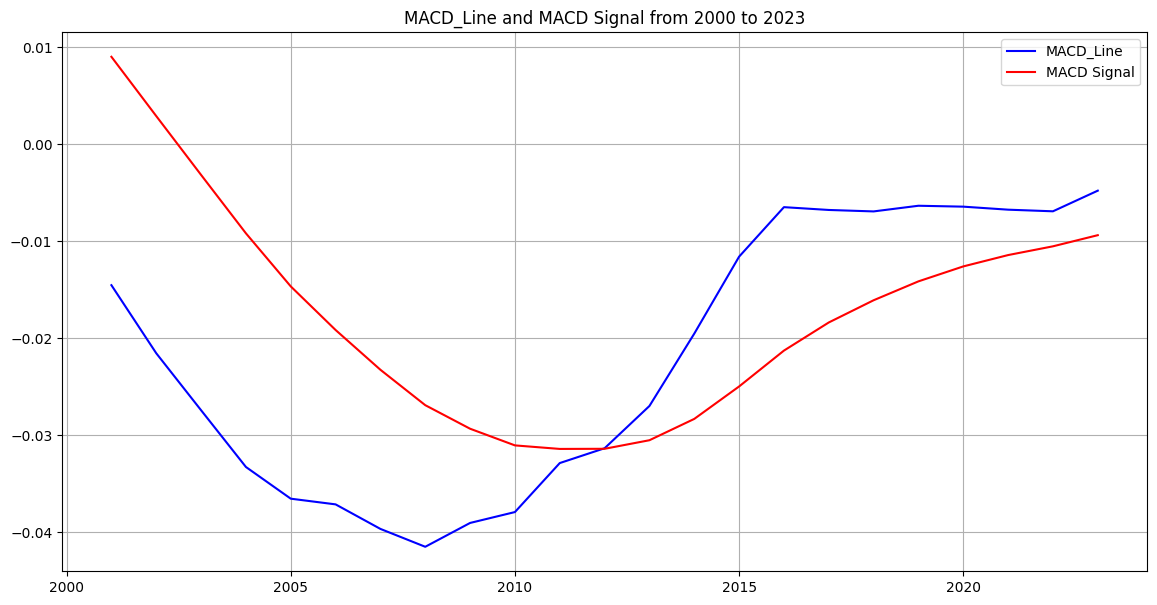

In [70]:
# # Plot MACD
start_date = '2000-06-01'
end_date = '2023-12-01'

# Plot MACD and MACD Signal for the specified date range
plt.figure(figsize=(14, 7))
plt.plot(dataMs['MACD_Line'].loc[start_date:end_date], label='MACD_Line', color='blue', linewidth=1.5)
plt.plot(dataMs['MACD_Signal'].loc[start_date:end_date], label='MACD Signal', color='red', linewidth=1.5)
plt.title('MACD_Line and MACD Signal from 2000 to 2023')
plt.grid(True)
plt.legend()

In [111]:
dataAp.to_csv("microsoft.csv")

## Technical indicator analysis of Nvidia company's stock price

In [72]:
dataNv.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,1999-01-22,0.043750,0.048828,0.038802,0.041016,0.037621,2714688000,0.0,0.0
1,1999-01-25,0.044271,0.045833,0.041016,0.045313,0.041562,510480000,0.0,0.0
2,1999-01-26,0.045833,0.046745,0.041146,0.041797,0.038337,343200000,0.0,0.0
3,1999-01-27,0.041927,0.042969,0.039583,0.041667,0.038218,244368000,0.0,0.0
4,1999-01-28,0.041667,0.041927,0.041276,0.041536,0.038098,227520000,0.0,0.0


In [73]:
dataNv["Date"].min()

'1999-01-22'

In [74]:
dataNv.shape

(6421, 9)

In [75]:
dataNv[dataAp.isnull()].sum()

Date              0
Open            0.0
High            0.0
Low             0.0
Close           0.0
Adj Close       0.0
Volume          0.0
Dividends       0.0
Stock Splits    0.0
dtype: object

In [76]:
# Calculate Moving Average
dataNv['SMA_20'] = talib.SMA(dataAp['Close'], timeperiod=20)
dataNv['SMA_50'] = talib.SMA(dataAp['Close'], timeperiod=50)

# Set initial values for SMA_20 and SMA_50
initial_sma_20 = dataNv['Close'].iloc[19]  # Value for the first SMA_20
initial_sma_50 = dataNv['Close'].iloc[49]  # Value for the first SMA_50

# Fill NaN values for SMA_20 and SMA_50 with the initial values
dataNv['SMA_20'] = dataNv['SMA_20'].fillna(initial_sma_20)
dataNv['SMA_50'] = dataNv['SMA_50'].fillna(initial_sma_50)

In [77]:
dataNv

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,SMA_20,SMA_50
0,1999-01-22,0.043750,0.048828,0.038802,0.041016,0.037621,2714688000,0.0,0.0,0.043490,0.041406
1,1999-01-25,0.044271,0.045833,0.041016,0.045313,0.041562,510480000,0.0,0.0,0.043490,0.041406
2,1999-01-26,0.045833,0.046745,0.041146,0.041797,0.038337,343200000,0.0,0.0,0.043490,0.041406
3,1999-01-27,0.041927,0.042969,0.039583,0.041667,0.038218,244368000,0.0,0.0,0.043490,0.041406
4,1999-01-28,0.041667,0.041927,0.041276,0.041536,0.038098,227520000,0.0,0.0,0.043490,0.041406
...,...,...,...,...,...,...,...,...,...,...,...
6416,2024-07-24,119.169998,119.949997,113.440002,114.250000,114.250000,327776900,0.0,0.0,2.460107,2.365350
6417,2024-07-25,113.040001,116.629997,106.300003,112.279999,112.279999,460067000,0.0,0.0,2.459411,2.364600
6418,2024-07-26,116.190002,116.199997,111.580002,113.059998,113.059998,293399100,0.0,0.0,2.451464,2.362829
6419,2024-07-29,113.690002,116.279999,111.300003,111.589996,111.589996,248152100,0.0,0.0,2.446946,2.363243


In [78]:
# Calculate RSI
initial_rsi = dataAp['Close'].iloc[13]
dataNv['RSI'] = talib.RSI(dataNv['Close'], timeperiod=14)
dataNv['RSI'] = dataNv['RSI'].fillna(initial_rsi)

In [79]:
dataNv

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,SMA_20,SMA_50,RSI
0,1999-01-22,0.043750,0.048828,0.038802,0.041016,0.037621,2714688000,0.0,0.0,0.043490,0.041406,0.154018
1,1999-01-25,0.044271,0.045833,0.041016,0.045313,0.041562,510480000,0.0,0.0,0.043490,0.041406,0.154018
2,1999-01-26,0.045833,0.046745,0.041146,0.041797,0.038337,343200000,0.0,0.0,0.043490,0.041406,0.154018
3,1999-01-27,0.041927,0.042969,0.039583,0.041667,0.038218,244368000,0.0,0.0,0.043490,0.041406,0.154018
4,1999-01-28,0.041667,0.041927,0.041276,0.041536,0.038098,227520000,0.0,0.0,0.043490,0.041406,0.154018
...,...,...,...,...,...,...,...,...,...,...,...,...
6416,2024-07-24,119.169998,119.949997,113.440002,114.250000,114.250000,327776900,0.0,0.0,2.460107,2.365350,41.589800
6417,2024-07-25,113.040001,116.629997,106.300003,112.279999,112.279999,460067000,0.0,0.0,2.459411,2.364600,39.943932
6418,2024-07-26,116.190002,116.199997,111.580002,113.059998,113.059998,293399100,0.0,0.0,2.451464,2.362829,40.940507
6419,2024-07-29,113.690002,116.279999,111.300003,111.589996,111.589996,248152100,0.0,0.0,2.446946,2.363243,39.606589


In [82]:
# Calculate MACD
initial_macd_line = dataNv['Close'].iloc[25]
initial_macd_signal = dataNv['Close'].iloc[25]
initial_macd_hist = initial_macd_line - initial_macd_signal
dataNv['MACD_Line'], dataNv['MACD_Signal'], dataNv['MACD_Hist'] = talib.MACD(dataAp['Close'], fastperiod=12, slowperiod=26, signalperiod=9)

dataNv['MACD_Line'] = dataNv['MACD_Line'].fillna(initial_macd_line)
dataNv['MACD_Signal'] = dataNv['MACD_Signal'].fillna(initial_macd_signal)
dataNv['MACD_Hist'] = dataNv['MACD_Hist'].fillna(initial_macd_hist)

In [83]:
dataNv

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,SMA_20,SMA_50,RSI,MACD_Line,MACD_Signal,MACD_Hist
0,1999-01-22,0.043750,0.048828,0.038802,0.041016,0.037621,2714688000,0.0,0.0,0.043490,0.041406,0.154018,0.045964,0.045964,0.000000
1,1999-01-25,0.044271,0.045833,0.041016,0.045313,0.041562,510480000,0.0,0.0,0.043490,0.041406,0.154018,0.045964,0.045964,0.000000
2,1999-01-26,0.045833,0.046745,0.041146,0.041797,0.038337,343200000,0.0,0.0,0.043490,0.041406,0.154018,0.045964,0.045964,0.000000
3,1999-01-27,0.041927,0.042969,0.039583,0.041667,0.038218,244368000,0.0,0.0,0.043490,0.041406,0.154018,0.045964,0.045964,0.000000
4,1999-01-28,0.041667,0.041927,0.041276,0.041536,0.038098,227520000,0.0,0.0,0.043490,0.041406,0.154018,0.045964,0.045964,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6416,2024-07-24,119.169998,119.949997,113.440002,114.250000,114.250000,327776900,0.0,0.0,2.460107,2.365350,41.589800,0.012228,0.034255,-0.022027
6417,2024-07-25,113.040001,116.629997,106.300003,112.279999,112.279999,460067000,0.0,0.0,2.459411,2.364600,39.943932,0.001776,0.027759,-0.025984
6418,2024-07-26,116.190002,116.199997,111.580002,113.059998,113.059998,293399100,0.0,0.0,2.451464,2.362829,40.940507,-0.012360,0.019736,-0.032095
6419,2024-07-29,113.690002,116.279999,111.300003,111.589996,111.589996,248152100,0.0,0.0,2.446946,2.363243,39.606589,-0.019504,0.011888,-0.031392


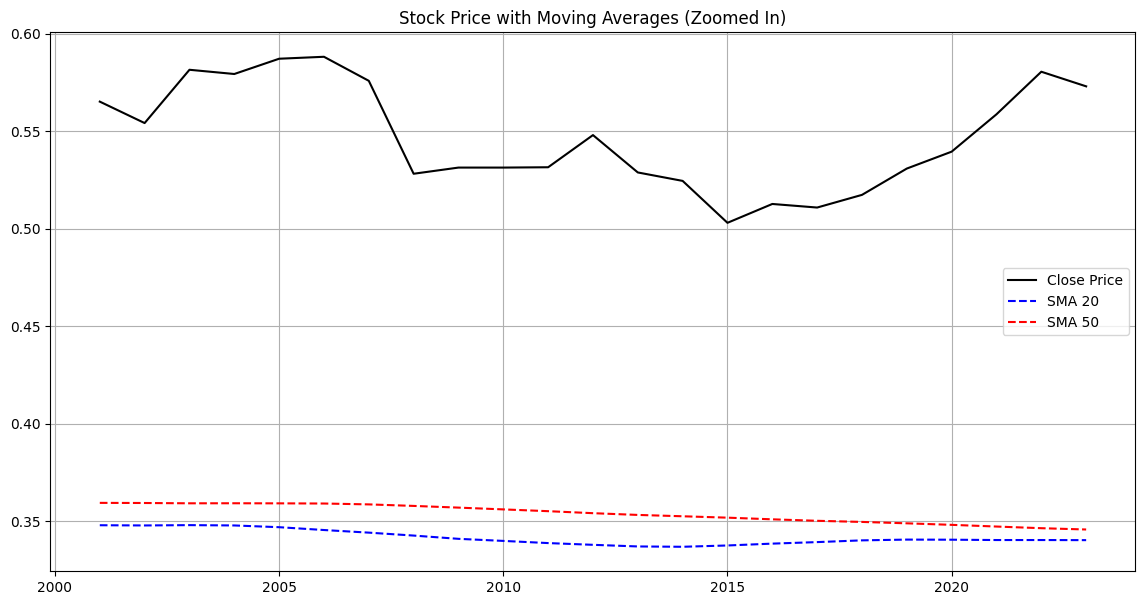

In [84]:
start_date = '2000-06-01'
end_date = '2023-12-01'

plt.figure(figsize=(14, 7))
plt.plot(dataNv['Close'].loc[start_date:end_date], label='Close Price', color='black', linewidth=1.5)
plt.plot(dataNv['SMA_20'].loc[start_date:end_date], label='SMA 20', color='blue', linestyle='--', linewidth=1.5)
plt.plot(dataNv['SMA_50'].loc[start_date:end_date], label='SMA 50', color='red', linestyle='--', linewidth=1.5)

plt.grid(True)
plt.title('Stock Price with Moving Averages (Zoomed In)')
plt.legend()

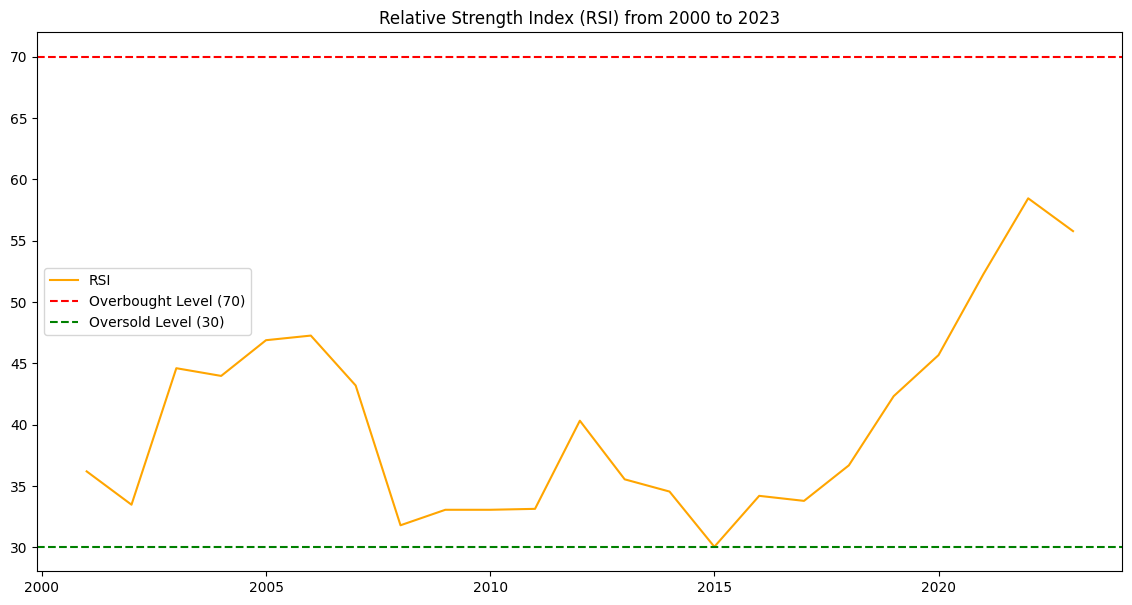

In [85]:
# Define the s1980-12-12tart and end dates for the zoomed-in period
start_date = '2000-12-12'
end_date = '2023-12-01'

# Plot RSI for the specified time period
plt.figure(figsize=(14, 7))
plt.plot(dataNv['RSI'].loc[start_date:end_date], label='RSI', color='orange')
plt.axhline(70, color='red', linestyle='--', label='Overbought Level (70)')
plt.axhline(30, color='green', linestyle='--', label='Oversold Level (30)')
plt.title('Relative Strength Index (RSI) from 2000 to 2023')
plt.legend()

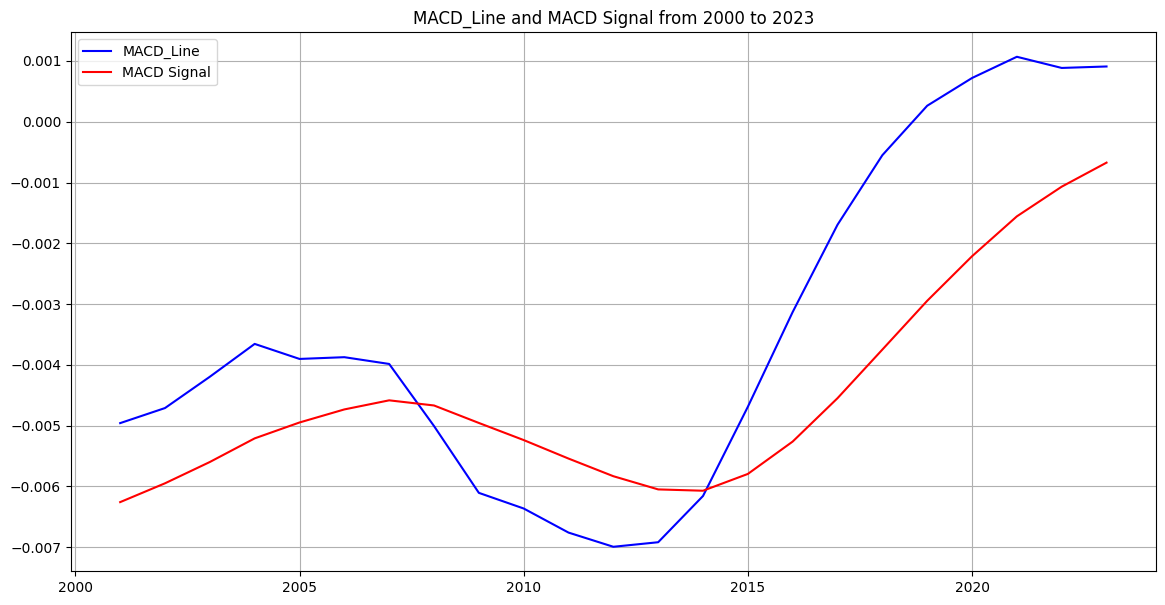

In [86]:
# # Plot MACD
start_date = '2000-06-01'
end_date = '2023-12-01'

# Plot MACD and MACD Signal for the specified date range
plt.figure(figsize=(14, 7))
plt.plot(dataNv['MACD_Line'].loc[start_date:end_date], label='MACD_Line', color='blue', linewidth=1.5)
plt.plot(dataNv['MACD_Signal'].loc[start_date:end_date], label='MACD Signal', color='red', linewidth=1.5)
plt.title('MACD_Line and MACD Signal from 2000 to 2023')
plt.grid(True)
plt.legend()
plt.show()

In [112]:
dataAp.to_csv("nvidia.csv")

## Technical indicator analysis of Tesla company's stock price

In [87]:
dataTs.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500,0.0,0.0
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500,0.0,0.0
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000,0.0,0.0
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000,0.0,0.0
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500,0.0,0.0


In [88]:
dataTs["Date"].min()

'2010-06-29'

In [89]:
dataTs.shape

(3545, 9)

In [90]:
dataTs[dataNv.isnull()].sum()

Date              0
Open            0.0
High            0.0
Low             0.0
Close           0.0
Adj Close       0.0
Volume          0.0
Dividends       0.0
Stock Splits    0.0
dtype: object

In [91]:
# Calculate Moving Average
dataTs['SMA_20'] = talib.SMA(dataTs['Close'], timeperiod=20)
dataTs['SMA_50'] = talib.SMA(dataTs['Close'], timeperiod=50)

# Set initial values for SMA_20 and SMA_50
initial_sma_20 = dataTs['Close'].iloc[19]  # Value for the first SMA_20
initial_sma_50 = dataTs['Close'].iloc[49]  # Value for the first SMA_50

# Fill NaN values for SMA_20 and SMA_50 with the initial values
dataTs['SMA_20'] = dataTs['SMA_20'].fillna(initial_sma_20)
dataTs['SMA_50'] = dataTs['SMA_50'].fillna(initial_sma_50)

In [92]:
dataTs

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,SMA_20,SMA_50
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500,0.0,0.0,1.370000,1.393333
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500,0.0,0.0,1.370000,1.393333
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000,0.0,0.0,1.370000,1.393333
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000,0.0,0.0,1.370000,1.393333
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500,0.0,0.0,1.370000,1.393333
...,...,...,...,...,...,...,...,...,...,...,...
3540,2024-07-24,225.419998,225.990005,214.710007,215.990005,215.990005,167942900,0.0,0.0,237.924999,202.183800
3541,2024-07-25,216.800003,226.000000,216.229996,220.250000,220.250000,100636500,0.0,0.0,239.118999,203.151000
3542,2024-07-26,221.190002,222.279999,215.330002,219.800003,219.800003,94604100,0.0,0.0,240.238000,203.996000
3543,2024-07-29,224.899994,234.270004,224.699997,232.100006,232.100006,129201800,0.0,0.0,241.949000,205.158200


In [93]:
# Calculate RSI
initial_rsi = dataAp['Close'].iloc[13]
dataTs['RSI'] = talib.RSI(dataTs['Close'], timeperiod=14)
dataTs['RSI'] = dataTs['RSI'].fillna(initial_rsi)

In [94]:
dataTs

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,SMA_20,SMA_50,RSI
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500,0.0,0.0,1.370000,1.393333,0.154018
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500,0.0,0.0,1.370000,1.393333,0.154018
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000,0.0,0.0,1.370000,1.393333,0.154018
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000,0.0,0.0,1.370000,1.393333,0.154018
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500,0.0,0.0,1.370000,1.393333,0.154018
...,...,...,...,...,...,...,...,...,...,...,...,...
3540,2024-07-24,225.419998,225.990005,214.710007,215.990005,215.990005,167942900,0.0,0.0,237.924999,202.183800,44.886918
3541,2024-07-25,216.800003,226.000000,216.229996,220.250000,220.250000,100636500,0.0,0.0,239.118999,203.151000,46.951389
3542,2024-07-26,221.190002,222.279999,215.330002,219.800003,219.800003,94604100,0.0,0.0,240.238000,203.996000,46.752165
3543,2024-07-29,224.899994,234.270004,224.699997,232.100006,232.100006,129201800,0.0,0.0,241.949000,205.158200,52.664511


In [96]:
# Calculate MACD
initial_macd_line = dataTs['Close'].iloc[25]
initial_macd_signal = dataTs['Close'].iloc[25]
initial_macd_hist = initial_macd_line - initial_macd_signal
dataTs['MACD_Line'], dataTs['MACD_Signal'], dataTs['MACD_Hist'] = talib.MACD(dataAp['Close'], fastperiod=12, slowperiod=26, signalperiod=9)

dataTs['MACD_Line'] = dataTs['MACD_Line'].fillna(initial_macd_line)
dataTs['MACD_Signal'] = dataTs['MACD_Signal'].fillna(initial_macd_signal)
dataTs['MACD_Hist'] = dataTs['MACD_Hist'].fillna(initial_macd_hist)

In [97]:
dataTs

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,SMA_20,SMA_50,RSI,MACD_Line,MACD_Signal,MACD_Hist
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500,0.0,0.0,1.370000,1.393333,0.154018,1.417333,1.417333,0.000000
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500,0.0,0.0,1.370000,1.393333,0.154018,1.417333,1.417333,0.000000
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000,0.0,0.0,1.370000,1.393333,0.154018,1.417333,1.417333,0.000000
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000,0.0,0.0,1.370000,1.393333,0.154018,1.417333,1.417333,0.000000
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500,0.0,0.0,1.370000,1.393333,0.154018,1.417333,1.417333,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3540,2024-07-24,225.419998,225.990005,214.710007,215.990005,215.990005,167942900,0.0,0.0,237.924999,202.183800,44.886918,-0.008879,-0.007925,-0.000954
3541,2024-07-25,216.800003,226.000000,216.229996,220.250000,220.250000,100636500,0.0,0.0,239.118999,203.151000,46.951389,-0.007595,-0.007859,0.000264
3542,2024-07-26,221.190002,222.279999,215.330002,219.800003,219.800003,94604100,0.0,0.0,240.238000,203.996000,46.752165,-0.007036,-0.007694,0.000658
3543,2024-07-29,224.899994,234.270004,224.699997,232.100006,232.100006,129201800,0.0,0.0,241.949000,205.158200,52.664511,-0.006429,-0.007441,0.001012


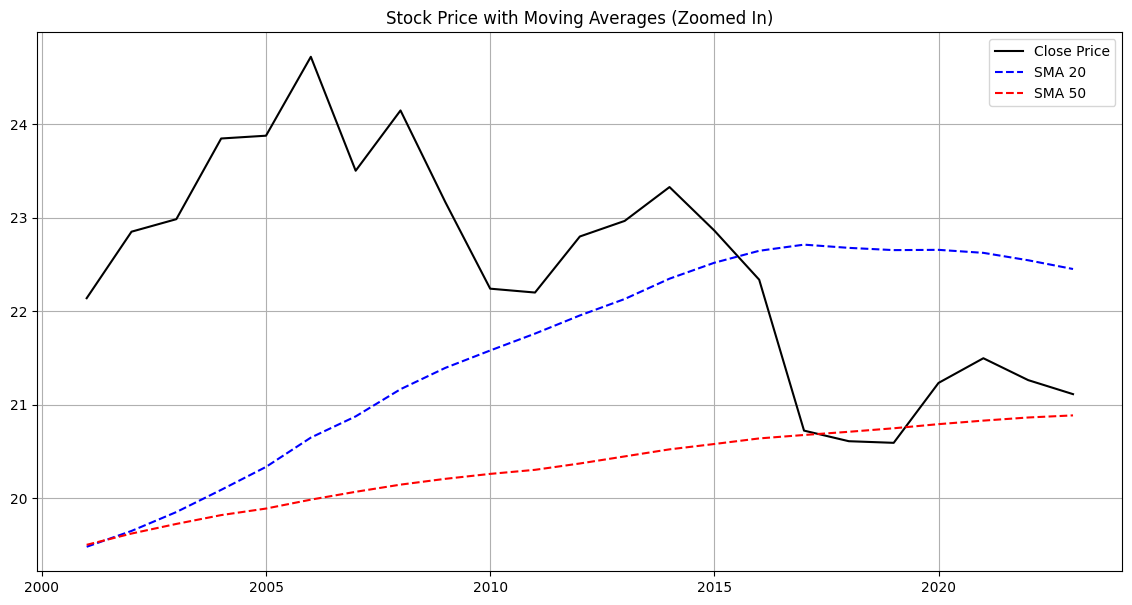

In [98]:
start_date = '2010-06-01'
end_date = '2023-12-01'

plt.figure(figsize=(14, 7))
plt.plot(dataTs['Close'].loc[start_date:end_date], label='Close Price', color='black', linewidth=1.5)
plt.plot(dataTs['SMA_20'].loc[start_date:end_date], label='SMA 20', color='blue', linestyle='--', linewidth=1.5)
plt.plot(dataTs['SMA_50'].loc[start_date:end_date], label='SMA 50', color='red', linestyle='--', linewidth=1.5)

plt.grid(True)
plt.title('Stock Price with Moving Averages')
plt.legend()
plt.show()

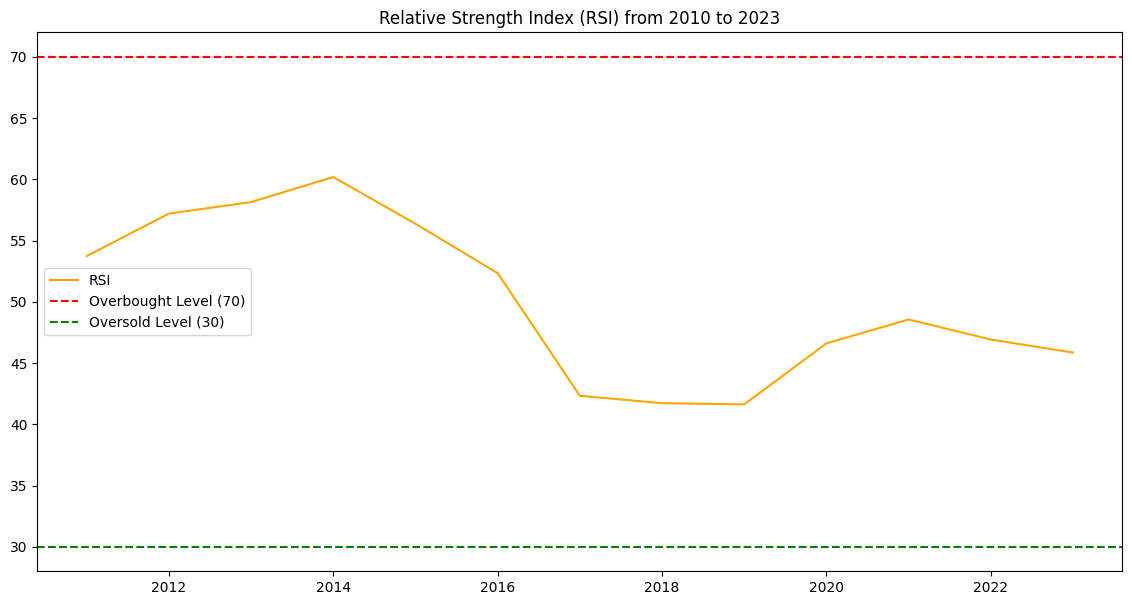

In [99]:

start_date = '2010-12-12'
end_date = '2023-12-01'

# Plot RSI for the specified time period
plt.figure(figsize=(14, 7))
plt.plot(dataTs['RSI'].loc[start_date:end_date], label='RSI', color='orange')
plt.axhline(70, color='red', linestyle='--', label='Overbought Level (70)')
plt.axhline(30, color='green', linestyle='--', label='Oversold Level (30)')
plt.title('Relative Strength Index (RSI) from 2010 to 2023')
plt.legend()

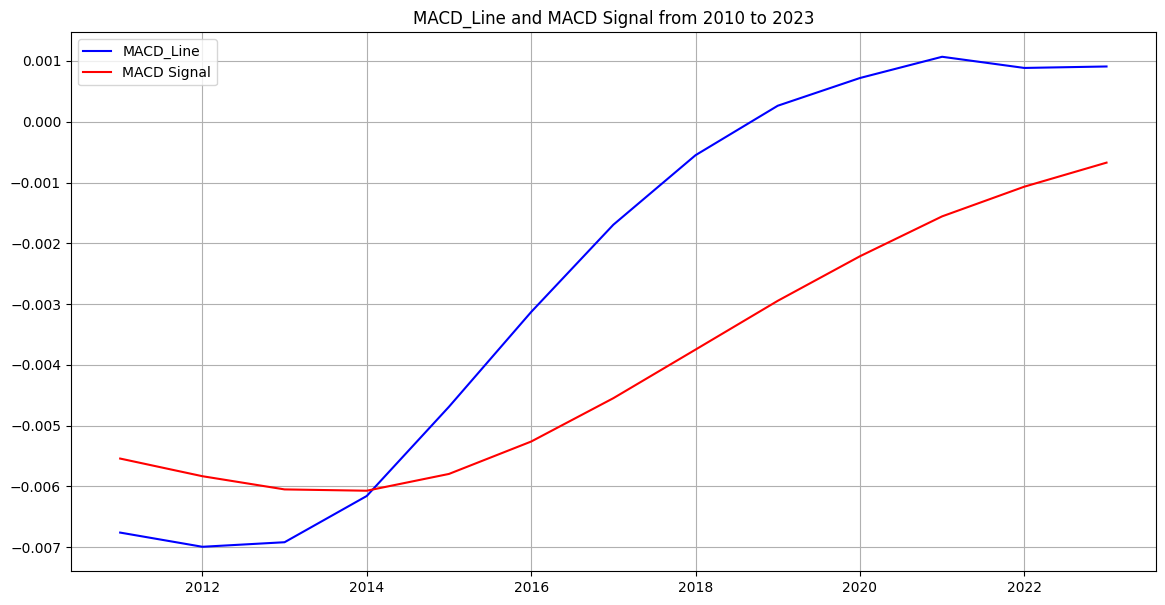

In [100]:
# # Plot MACD
start_date = '2010-06-01'
end_date = '2023-12-01'

# Plot MACD and MACD Signal for the specified date range
plt.figure(figsize=(14, 7))
plt.plot(dataTs['MACD_Line'].loc[start_date:end_date], label='MACD_Line', color='blue', linewidth=1.5)
plt.plot(dataTs['MACD_Signal'].loc[start_date:end_date], label='MACD Signal', color='red', linewidth=1.5)
plt.title('MACD_Line and MACD Signal from 2010 to 2023')
plt.grid(True)
plt.legend()

In [113]:
dataAp.to_csv("tesla.csv")